In [8]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [9]:
import pandas as pd

data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

In [10]:
df= pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx',parse_dates = True,squeeze= True)

In [11]:
df.head()

year_week  ID_material   Units
0   2019-11    120010970   540.0
1   2019-12    120010970   750.0
2   2019-13    120010970   960.0
3   2019-14    120010970   720.0
4   2019-15    120010970  1620.0

In [12]:
df['Units'].value_counts()

0.0       229
120.0      94
180.0      71
60.0       63
720.0      53
         ... 
2295.0      1
1215.0      1
1035.0      1
135.0       1
1452.0      1
Name: Units, Length: 568, dtype: int64

In [13]:
df['ID_material'].value_counts()

120004096    299
120014488    268
120014486    261
120009816    243
120015996    240
120009814    233
120010342    231
120010566    218
120010970    186
120011782    165
120011556    157
120012154    138
120012606    118
120015842    100
Name: ID_material, dtype: int64

In [14]:
print(data.shape)

(2857, 3)


In [ ]:
##ADDING COLUMNS OF REAL GDP PER CAPITA 

In [44]:
Ecolosses= pd.read_excel('Climate Related Economic losses.xlsx')
Ecolosses.head(15)

Year  Loss in Million euro
0  2017                   379
1  2018                  1970
2  2019                  4503
3  2020                   673
4  2021                  2705

In [43]:
Taxaggregates= pd.read_excel('Main national tax aggregates.xlsx')
Taxaggregates.head(9)

Year Value
0  2017  34.6
1  2018  35.4
2  2019  35.4
3  2020  37.7
4  2021    39
5  2022     :

In [60]:
import pandas as pd

# Load the original dataset
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Split the 'year_week' column into separate 'Year' and 'Week' columns
data['Year'] = data['year_week'].apply(lambda x: int(str(x)[:4]))
data['Week'] = data['year_week'].apply(lambda x: int(str(x)[4:]))

# Load the external columns datasets
ecolosses = pd.read_excel('Climate Related Economic losses.xlsx')
taxaggregates = pd.read_excel('Main national tax aggregates.xlsx')

# Convert the 'Year' column in the external datasets to int64
ecolosses['Year'] = ecolosses['Year'].astype(int)
taxaggregates['Year'] = taxaggregates['Year'].astype(int)

# Merge the external columns datasets with the original dataset
merged_data = pd.merge(data, ecolosses, on='Year')
merged_data = pd.merge(merged_data, taxaggregates, on='Year')

# Save the merged dataset to a new Excel file
merged_data.to_excel('merged_dataset.xlsx', index=False)


In [61]:
import pandas as pd

# Load the merged dataset
merged_data = pd.read_excel('merged_dataset.xlsx')

# View the merged dataset
print(merged_data)


     year_week  ID_material   Units  Year  Week  Loss in Million euro  Value
0      2019-11    120010970   540.0  2019   -11                  4503   35.4
1      2019-12    120010970   750.0  2019   -12                  4503   35.4
2      2019-13    120010970   960.0  2019   -13                  4503   35.4
3      2019-14    120010970   720.0  2019   -14                  4503   35.4
4      2019-15    120010970  1620.0  2019   -15                  4503   35.4
...        ...          ...     ...   ...   ...                   ...    ...
2306   2017-48    120014488  3870.0  2017   -48                   379   34.6
2307   2017-49    120014488  2880.0  2017   -49                   379   34.6
2308   2017-50    120014488  5040.0  2017   -50                   379   34.6
2309   2017-51    120014488  1620.0  2017   -51                   379   34.6
2310   2017-52    120014488  2520.0  2017   -52                   379   34.6

[2311 rows x 7 columns]


In [62]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year_week             2311 non-null   object 
 1   ID_material           2311 non-null   int64  
 2   Units                 2311 non-null   float64
 3   Year                  2311 non-null   int64  
 4   Week                  2311 non-null   int64  
 5   Loss in Million euro  2311 non-null   int64  
 6   Value                 2311 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 126.5+ KB


In [ ]:
##DATA VISUALIZATION

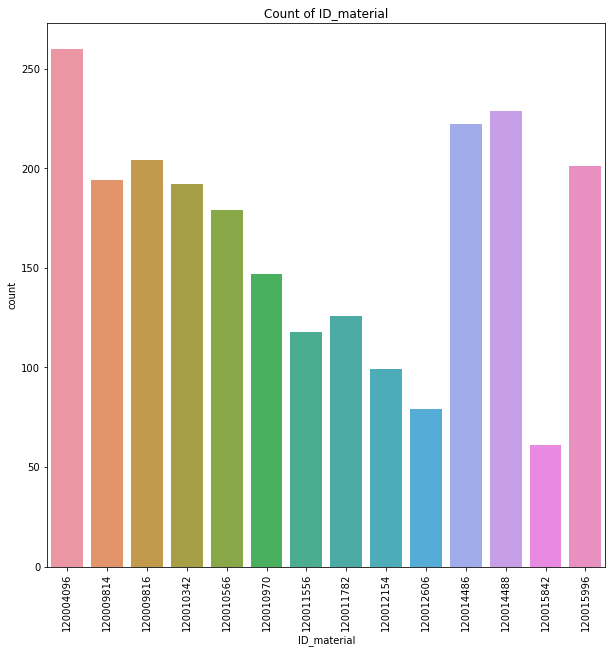

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the count of ID_material
plt.figure(figsize=(10, 10))
sns.countplot(x='ID_material', data=merged_data)
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.title('Count of ID_material')
plt.show()


In [225]:
merged_data['ID_material'].value_counts(dropna= False)

120004096    260
120014488    229
120014486    222
120009816    204
120015996    201
120009814    194
120010342    192
120010566    179
120010970    147
120011782    126
120011556    118
120012154     99
120012606     79
120015842     61
Name: ID_material, dtype: int64

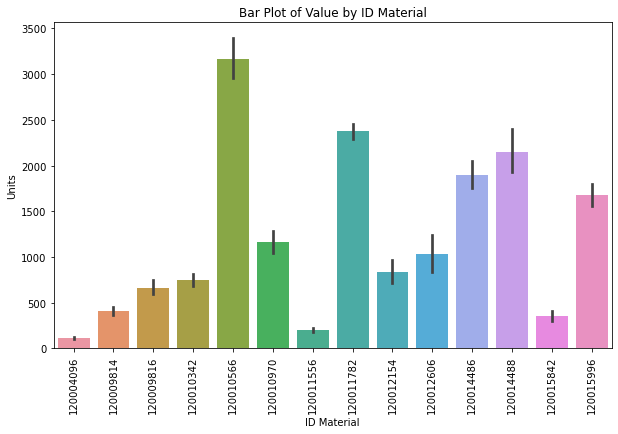

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='ID_material', y='Units', data=merged_data)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.xlabel('ID Material')
plt.ylabel('Units')
plt.title('Bar Plot of Value by ID Material')
plt.show()


In [238]:
#120010566 has the highest Units ordered out of all and a very low production of 120004096

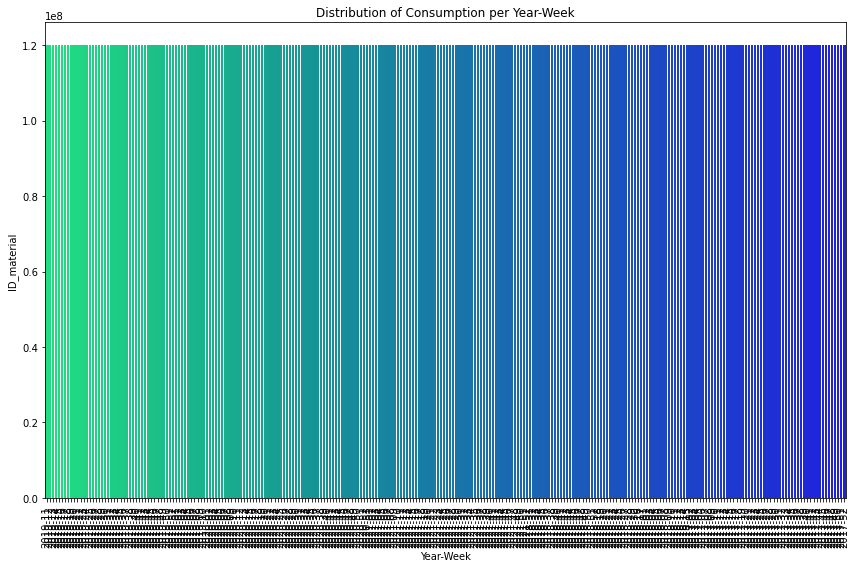

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x='year_week', y='ID_material', data=merged_data, palette='winter_r')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.xlabel('Year-Week')
plt.ylabel('ID_material')
plt.title('Distribution of Consumption per Year-Week')
plt.tight_layout()
plt.show()


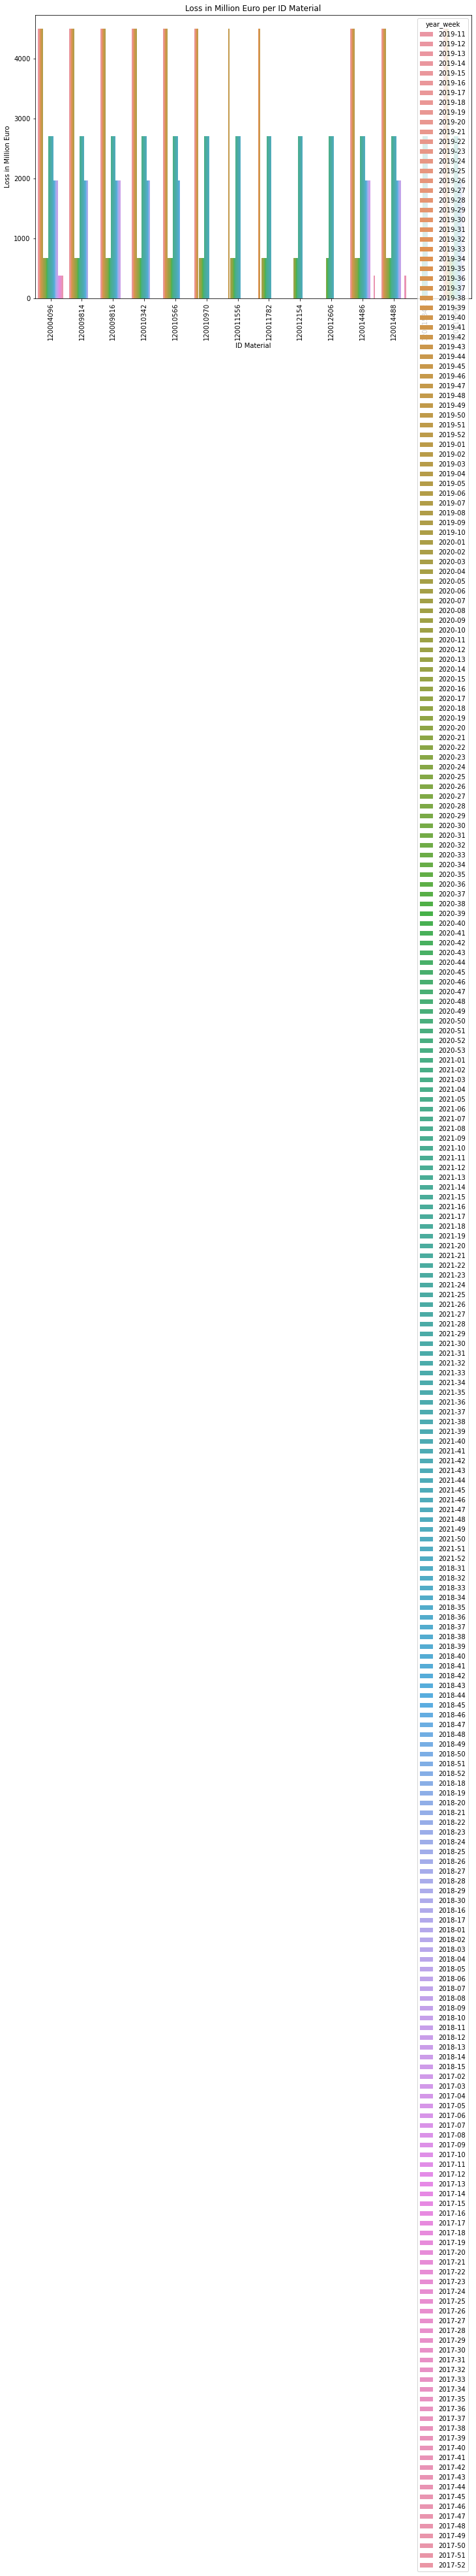

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x='ID_material', y='Loss in Million euro', hue='year_week', data=merged_data)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.xlabel('ID Material')
plt.ylabel('Loss in Million Euro')
plt.title('Loss in Million Euro per ID Material')
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='Loss in Million euro', ylabel='Year'>

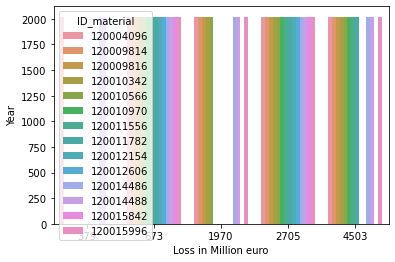

In [115]:
sns.barplot(x='Loss in Million euro', y= 'Year', hue='ID_material',data= merged_data)

In [245]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year_week             2311 non-null   object 
 1   ID_material           2311 non-null   int64  
 2   Units                 2311 non-null   float64
 3   Year                  2311 non-null   int64  
 4   Week                  2311 non-null   int64  
 5   Loss in Million euro  2311 non-null   int64  
 6   Value                 2311 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 126.5+ KB


<AxesSubplot:xlabel='ID_material', ylabel='Density'>

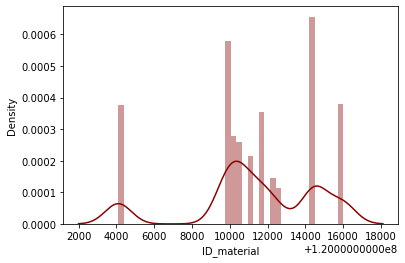

In [246]:
sns.distplot(merged_data['ID_material'],kde=True,color = 'darkred',bins=40)

<AxesSubplot:xlabel='Units', ylabel='Density'>

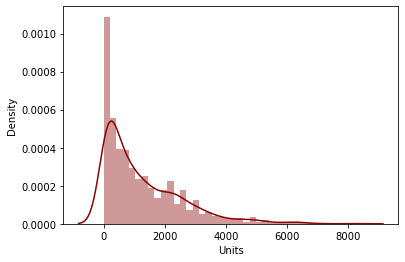

In [247]:
sns.distplot(merged_data['Units'],kde=True,color = 'darkred',bins=40)

In [121]:
#UNITS is right skewed

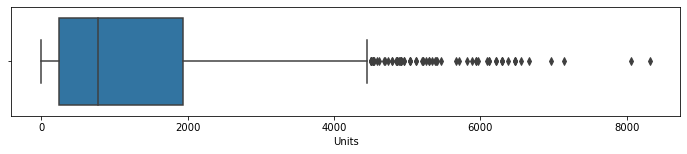

In [123]:
g = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=merged_data['Units'],whis=1.5)

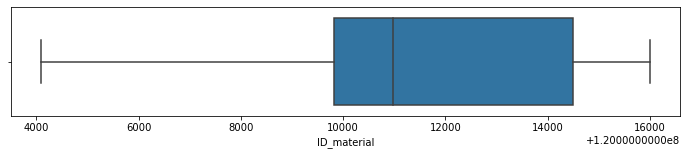

In [482]:
g = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=merged_data['ID_material'],whis=1.5)

In [124]:
merged_data['year_week'].value_counts()

2021-26    14
2021-02    14
2020-53    14
2020-52    14
2020-51    14
           ..
2017-26     1
2017-27     1
2017-28     1
2017-29     1
2017-31     1
Name: year_week, Length: 260, dtype: int64

In [125]:
merged_data.isnull().sum()

year_week               0
ID_material             0
Units                   0
Year                    0
Week                    0
Loss in Million euro    0
Value                   0
dtype: int64

In [126]:
merged_data.corr()

ID_material     Units      Year      Week  \
ID_material              1.000000  0.370746  0.136526 -0.025058   
Units                    0.370746  1.000000  0.008805 -0.001934   
Year                     0.136526  0.008805  1.000000  0.096573   
Week                    -0.025058 -0.001934  0.096573  1.000000   
Loss in Million euro     0.036317  0.066290 -0.019329  0.030749   
Value                    0.117555 -0.027900  0.953003  0.082203   

                      Loss in Million euro     Value  
ID_material                       0.036317  0.117555  
Units                             0.066290 -0.027900  
Year                             -0.019329  0.953003  
Week                              0.030749  0.082203  
Loss in Million euro              1.000000 -0.259036  
Value                            -0.259036  1.000000

<AxesSubplot:>

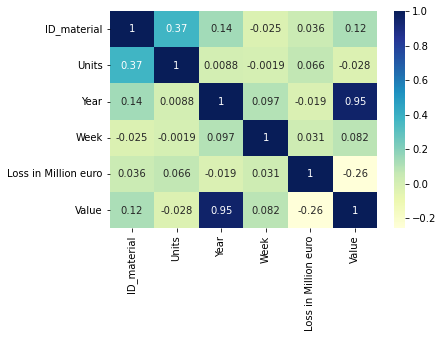

In [127]:
sns.heatmap(merged_data.corr(),annot= True,cmap="YlGnBu")

In [128]:
##Checking if the data is Stationary by using Augmneted Dickey Fuller Test

In [142]:
X= merged_data.ID_material
result = adfuller(X)

In [249]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.334980
p-value: 0.000386
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [ ]:
#In summary, based on the ADF test results, we have strong evidence to suggest that the 
#time series is stationary. This is an important finding for time series analysis and 
#forecasting, as it indicates that the data exhibits consistent patterns and can be more 
#reliably modeled and predicted.

In [145]:
new_df = merged_data.sort_values('year_week')

In [146]:
new_df

year_week  ID_material   Units  Year  Week  Loss in Million euro  Value
2227   2017-02    120004096   120.0  2017    -2                   379   34.6
2228   2017-03    120004096   120.0  2017    -3                   379   34.6
2229   2017-04    120004096   300.0  2017    -4                   379   34.6
2230   2017-05    120004096    60.0  2017    -5                   379   34.6
2231   2017-06    120004096   120.0  2017    -6                   379   34.6
...        ...          ...     ...   ...   ...                   ...    ...
1313   2021-52    120011556   162.0  2021   -52                  2705   39.0
1781   2021-52    120014486  1134.0  2021   -52                  2705   39.0
1573   2021-52    120012154   495.0  2021   -52                  2705   39.0
1209   2021-52    120010970  1440.0  2021   -52                  2705   39.0
1417   2021-52    120010342     0.0  2021   -52                  2705   39.0

[2311 rows x 7 columns]

In [ ]:
120004096    260
120014488    229
120014486    222
120009816    204
120015996    201
120009814    194
120010342    192
120010566    179
120010970    147
120011782    126
120011556    118
120012154     99
120012606     79
120015842     61

In [250]:
##Segmentation based on ID_material

In [150]:
Product1=new_df[new_df['ID_material'] == 120004096]

Product2= new_df[new_df['ID_material']== 120014488]

Product3= new_df[new_df['ID_material']== 120014486]

Product4= new_df[new_df['ID_material']== 120009816]

Product5= new_df[new_df['ID_material']== 120015996]

Product6=new_df[new_df['ID_material'] == 120009814]

Product7= new_df[new_df['ID_material']== 120010342]

Product8= new_df[new_df['ID_material']== 120010566]

Product9= new_df[new_df['ID_material']== 120010970]

Product10= new_df[new_df['ID_material']== 120011782]

Product11= new_df[new_df['ID_material']== 120011556]

Product12= new_df[new_df['ID_material']== 120012154]

Product13= new_df[new_df['ID_material']== 120012606]

Product14= new_df[new_df['ID_material']== 120015842]

In [151]:
Product1

year_week  ID_material  Units  Year  Week  Loss in Million euro  Value
2227   2017-02    120004096  120.0  2017    -2                   379   34.6
2228   2017-03    120004096  120.0  2017    -3                   379   34.6
2229   2017-04    120004096  300.0  2017    -4                   379   34.6
2230   2017-05    120004096   60.0  2017    -5                   379   34.6
2231   2017-06    120004096  120.0  2017    -6                   379   34.6
...        ...          ...    ...   ...   ...                   ...    ...
1621   2021-48    120004096  180.0  2021   -48                  2705   39.0
1622   2021-49    120004096    0.0  2021   -49                  2705   39.0
1623   2021-50    120004096  300.0  2021   -50                  2705   39.0
1624   2021-51    120004096   60.0  2021   -51                  2705   39.0
1625   2021-52    120004096  180.0  2021   -52                  2705   39.0

[260 rows x 7 columns]

In [152]:
Product2

year_week  ID_material   Units  Year  Week  Loss in Million euro  Value
2291   2017-33    120014488   180.0  2017   -33                   379   34.6
2292   2017-34    120014488  4860.0  2017   -34                   379   34.6
2293   2017-35    120014488  2340.0  2017   -35                   379   34.6
2294   2017-36    120014488  1620.0  2017   -36                   379   34.6
2295   2017-37    120014488  1620.0  2017   -37                   379   34.6
...        ...          ...     ...   ...   ...                   ...    ...
1829   2021-48    120014488   180.0  2021   -48                  2705   39.0
1830   2021-49    120014488   180.0  2021   -49                  2705   39.0
1831   2021-50    120014488   180.0  2021   -50                  2705   39.0
1832   2021-51    120014488   180.0  2021   -51                  2705   39.0
1833   2021-52    120014488   180.0  2021   -52                  2705   39.0

[229 rows x 7 columns]

In [153]:
Product3

year_week  ID_material   Units  Year  Week  Loss in Million euro  Value
2278   2017-40    120014486  3024.0  2017   -40                   379   34.6
2279   2017-41    120014486   378.0  2017   -41                   379   34.6
2280   2017-42    120014486   912.0  2017   -42                   379   34.6
2281   2017-43    120014486  2646.0  2017   -43                   379   34.6
2282   2017-44    120014486   756.0  2017   -44                   379   34.6
...        ...          ...     ...   ...   ...                   ...    ...
1777   2021-48    120014486  4536.0  2021   -48                  2705   39.0
1778   2021-49    120014486  2646.0  2021   -49                  2705   39.0
1779   2021-50    120014486  1134.0  2021   -50                  2705   39.0
1780   2021-51    120014486   378.0  2021   -51                  2705   39.0
1781   2021-52    120014486  1134.0  2021   -52                  2705   39.0

[222 rows x 7 columns]

In [154]:
Product4

year_week  ID_material   Units  Year  Week  Loss in Million euro  Value
2032   2018-06    120009816   720.0  2018    -6                  1970   35.4
2033   2018-07    120009816   432.0  2018    -7                  1970   35.4
2034   2018-08    120009816   432.0  2018    -8                  1970   35.4
2035   2018-09    120009816   576.0  2018    -9                  1970   35.4
2036   2018-10    120009816   288.0  2018   -10                  1970   35.4
...        ...          ...     ...   ...   ...                   ...    ...
1673   2021-48    120009816  1008.0  2021   -48                  2705   39.0
1674   2021-49    120009816   432.0  2021   -49                  2705   39.0
1675   2021-50    120009816   144.0  2021   -50                  2705   39.0
1676   2021-51    120009816     0.0  2021   -51                  2705   39.0
1677   2021-52    120009816     0.0  2021   -52                  2705   39.0

[204 rows x 7 columns]

In [155]:
Product5

year_week  ID_material   Units  Year  Week  Loss in Million euro  Value
2183   2018-09    120015996   482.0  2018    -9                  1970   35.4
2184   2018-10    120015996   536.0  2018   -10                  1970   35.4
2185   2018-11    120015996     0.0  2018   -11                  1970   35.4
2186   2018-12    120015996     0.0  2018   -12                  1970   35.4
2187   2018-13    120015996    32.0  2018   -13                  1970   35.4
...        ...          ...     ...   ...   ...                   ...    ...
1881   2021-48    120015996  1568.0  2021   -48                  2705   39.0
1882   2021-49    120015996   256.0  2021   -49                  2705   39.0
1883   2021-50    120015996   968.0  2021   -50                  2705   39.0
1884   2021-51    120015996    76.0  2021   -51                  2705   39.0
1885   2021-52    120015996   604.0  2021   -52                  2705   39.0

[201 rows x 7 columns]

In [156]:
Product6

year_week  ID_material  Units  Year  Week  Loss in Million euro  Value
1943   2018-16    120009814  468.0  2018   -16                  1970   35.4
1944   2018-17    120009814  624.0  2018   -17                  1970   35.4
1945   2018-18    120009814  156.0  2018   -18                  1970   35.4
1946   2018-19    120009814    0.0  2018   -19                  1970   35.4
1947   2018-20    120009814  624.0  2018   -20                  1970   35.4
...        ...          ...    ...   ...   ...                   ...    ...
1465   2021-48    120009814  468.0  2021   -48                  2705   39.0
1466   2021-49    120009814  468.0  2021   -49                  2705   39.0
1467   2021-50    120009814  156.0  2021   -50                  2705   39.0
1468   2021-51    120009814  312.0  2021   -51                  2705   39.0
1469   2021-52    120009814  624.0  2021   -52                  2705   39.0

[194 rows x 7 columns]

In [157]:
Product7

year_week  ID_material  Units  Year  Week  Loss in Million euro  Value
1908   2018-18    120010342  480.0  2018   -18                  1970   35.4
1909   2018-19    120010342  900.0  2018   -19                  1970   35.4
1910   2018-20    120010342  240.0  2018   -20                  1970   35.4
1911   2018-21    120010342  570.0  2018   -21                  1970   35.4
1912   2018-22    120010342  900.0  2018   -22                  1970   35.4
...        ...          ...    ...   ...   ...                   ...    ...
1413   2021-48    120010342    0.0  2021   -48                  2705   39.0
1414   2021-49    120010342    0.0  2021   -49                  2705   39.0
1415   2021-50    120010342    0.0  2021   -50                  2705   39.0
1416   2021-51    120010342    0.0  2021   -51                  2705   39.0
1417   2021-52    120010342    0.0  2021   -52                  2705   39.0

[192 rows x 7 columns]

In [158]:
Product8

year_week  ID_material   Units  Year  Week  Loss in Million euro  Value
1886   2018-31    120010566  5256.0  2018   -31                  1970   35.4
1887   2018-32    120010566     0.0  2018   -32                  1970   35.4
1888   2018-33    120010566  8316.0  2018   -33                  1970   35.4
1889   2018-34    120010566   672.0  2018   -34                  1970   35.4
1890   2018-35    120010566  1680.0  2018   -35                  1970   35.4
...        ...          ...     ...   ...   ...                   ...    ...
1361   2021-48    120010566  3084.0  2021   -48                  2705   39.0
1362   2021-49    120010566  2226.0  2021   -49                  2705   39.0
1363   2021-50    120010566  4512.0  2021   -50                  2705   39.0
1364   2021-51    120010566  2436.0  2021   -51                  2705   39.0
1365   2021-52    120010566  2664.0  2021   -52                  2705   39.0

[179 rows x 7 columns]

In [159]:
Product9

year_week  ID_material   Units  Year  Week  Loss in Million euro  Value
0      2019-11    120010970   540.0  2019   -11                  4503   35.4
1      2019-12    120010970   750.0  2019   -12                  4503   35.4
2      2019-13    120010970   960.0  2019   -13                  4503   35.4
3      2019-14    120010970   720.0  2019   -14                  4503   35.4
4      2019-15    120010970  1620.0  2019   -15                  4503   35.4
...        ...          ...     ...   ...   ...                   ...    ...
1205   2021-48    120010970  2160.0  2021   -48                  2705   39.0
1206   2021-49    120010970   120.0  2021   -49                  2705   39.0
1207   2021-50    120010970   960.0  2021   -50                  2705   39.0
1208   2021-51    120010970   120.0  2021   -51                  2705   39.0
1209   2021-52    120010970  1440.0  2021   -52                  2705   39.0

[147 rows x 7 columns]

In [161]:
Product10

year_week  ID_material   Units  Year  Week  Loss in Million euro  Value
315    2019-32    120011782  1344.0  2019   -32                  4503   35.4
316    2019-33    120011782  2604.0  2019   -33                  4503   35.4
317    2019-34    120011782  2604.0  2019   -34                  4503   35.4
318    2019-35    120011782  2772.0  2019   -35                  4503   35.4
319    2019-36    120011782  2100.0  2019   -36                  4503   35.4
...        ...          ...     ...   ...   ...                   ...    ...
1725   2021-48    120011782  2856.0  2021   -48                  2705   39.0
1726   2021-49    120011782  2016.0  2021   -49                  2705   39.0
1727   2021-50    120011782  3276.0  2021   -50                  2705   39.0
1728   2021-51    120011782  1680.0  2021   -51                  2705   39.0
1729   2021-52    120011782  2436.0  2021   -52                  2705   39.0

[126 rows x 7 columns]

In [162]:
Product11

year_week  ID_material  Units  Year  Week  Loss in Million euro  Value
42     2019-40    120011556  144.0  2019   -40                  4503   35.4
43     2019-41    120011556   90.0  2019   -41                  4503   35.4
44     2019-42    120011556  204.0  2019   -42                  4503   35.4
45     2019-43    120011556  126.0  2019   -43                  4503   35.4
46     2019-44    120011556  252.0  2019   -44                  4503   35.4
...        ...          ...    ...   ...   ...                   ...    ...
1309   2021-48    120011556  394.0  2021   -48                  2705   39.0
1310   2021-49    120011556  218.0  2021   -49                  2705   39.0
1311   2021-50    120011556  108.0  2021   -50                  2705   39.0
1312   2021-51    120011556   78.0  2021   -51                  2705   39.0
1313   2021-52    120011556  162.0  2021   -52                  2705   39.0

[118 rows x 7 columns]

In [163]:
Product12

year_week  ID_material   Units  Year  Week  Loss in Million euro  Value
793    2020-07    120012154   765.0  2020    -7                   673   37.7
794    2020-08    120012154  2205.0  2020    -8                   673   37.7
795    2020-09    120012154  1935.0  2020    -9                   673   37.7
796    2020-10    120012154  2745.0  2020   -10                   673   37.7
797    2020-11    120012154  2220.0  2020   -11                   673   37.7
...        ...          ...     ...   ...   ...                   ...    ...
1569   2021-48    120012154   765.0  2021   -48                  2705   39.0
1570   2021-49    120012154   270.0  2021   -49                  2705   39.0
1571   2021-50    120012154   765.0  2021   -50                  2705   39.0
1572   2021-51    120012154   405.0  2021   -51                  2705   39.0
1573   2021-52    120012154   495.0  2021   -52                  2705   39.0

[99 rows x 7 columns]

In [164]:
Product13

year_week  ID_material   Units  Year  Week  Loss in Million euro  Value
545    2020-27    120012606   910.0  2020   -27                   673   37.7
546    2020-28    120012606   280.0  2020   -28                   673   37.7
547    2020-29    120012606    70.0  2020   -29                   673   37.7
548    2020-30    120012606   490.0  2020   -30                   673   37.7
549    2020-31    120012606  1540.0  2020   -31                   673   37.7
...        ...          ...     ...   ...   ...                   ...    ...
1257   2021-48    120012606   280.0  2021   -48                  2705   39.0
1258   2021-49    120012606   420.0  2021   -49                  2705   39.0
1259   2021-50    120012606  2310.0  2021   -50                  2705   39.0
1260   2021-51    120012606   140.0  2021   -51                  2705   39.0
1261   2021-52    120012606  2380.0  2021   -52                  2705   39.0

[79 rows x 7 columns]

In [165]:
Product14

year_week  ID_material  Units  Year  Week  Loss in Million euro  Value
784    2020-45    120015842  600.0  2020   -45                   673   37.7
785    2020-46    120015842  760.0  2020   -46                   673   37.7
786    2020-47    120015842  920.0  2020   -47                   673   37.7
787    2020-48    120015842  200.0  2020   -48                   673   37.7
788    2020-49    120015842  320.0  2020   -49                   673   37.7
...        ...          ...    ...   ...   ...                   ...    ...
1517   2021-48    120015842  620.0  2021   -48                  2705   39.0
1518   2021-49    120015842  640.0  2021   -49                  2705   39.0
1519   2021-50    120015842  360.0  2021   -50                  2705   39.0
1520   2021-51    120015842  640.0  2021   -51                  2705   39.0
1521   2021-52    120015842  400.0  2021   -52                  2705   39.0

[61 rows x 7 columns]

In [168]:
Product1= Product1.groupby('year_week')['Units'].sum().reset_index()

Product2= Product2.groupby('year_week')['Units'].sum().reset_index()

Product3= Product3.groupby('year_week')['Units'].sum().reset_index()

Product3= Product3.groupby('year_week')['Units'].sum().reset_index()

Product4= Product4.groupby('year_week')['Units'].sum().reset_index()

Product5= Product5.groupby('year_week')['Units'].sum().reset_index()

Product6= Product6.groupby('year_week')['Units'].sum().reset_index()

Product7= Product7.groupby('year_week')['Units'].sum().reset_index()

Product8= Product8.groupby('year_week')['Units'].sum().reset_index()

Product9= Product9.groupby('year_week')['Units'].sum().reset_index()

Product10= Product10.groupby('year_week')['Units'].sum().reset_index()

Product11= Product11.groupby('year_week')['Units'].sum().reset_index()

Product12= Product12.groupby('year_week')['Units'].sum().reset_index()

Product13= Product13.groupby('year_week')['Units'].sum().reset_index()

Product14= Product14.groupby('year_week')['Units'].sum().reset_index()

In [169]:
Product1= Product1.set_index('year_week')

Product2= Product2.set_index('year_week')

Product3= Product3.set_index('year_week')

Product4= Product4.set_index('year_week')

Product5= Product5.set_index('year_week')

Product6= Product6.set_index('year_week')

Product7= Product7.set_index('year_week')

Product8= Product8.set_index('year_week')

Product9= Product9.set_index('year_week')

Product10= Product10.set_index('year_week')

Product11= Product11.set_index('year_week')

Product12= Product12.set_index('year_week')

Product13= Product13.set_index('year_week')

Product14= Product14.set_index('year_week')


In [170]:
Product1

Units
year_week       
2017-02    120.0
2017-03    120.0
2017-04    300.0
2017-05     60.0
2017-06    120.0
...          ...
2021-48    180.0
2021-49      0.0
2021-50    300.0
2021-51     60.0
2021-52    180.0

[260 rows x 1 columns]

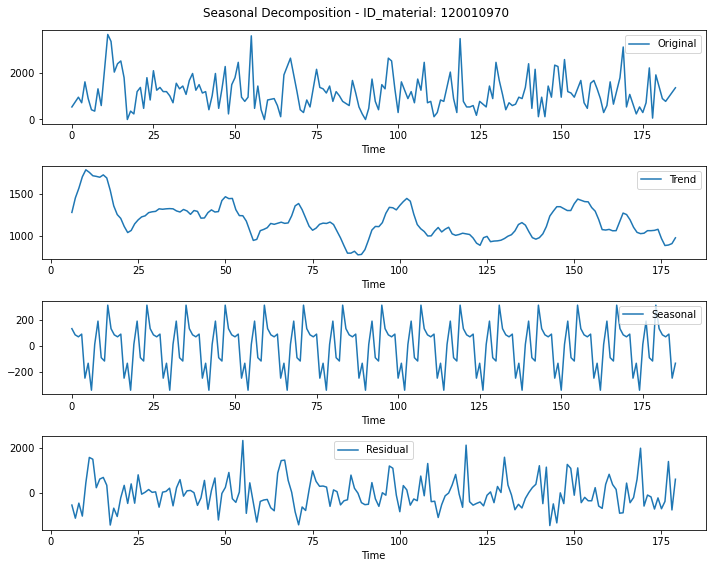

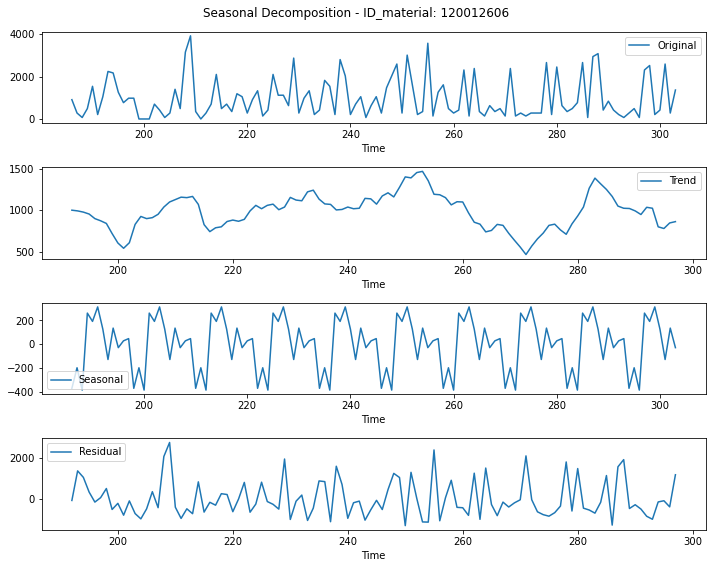

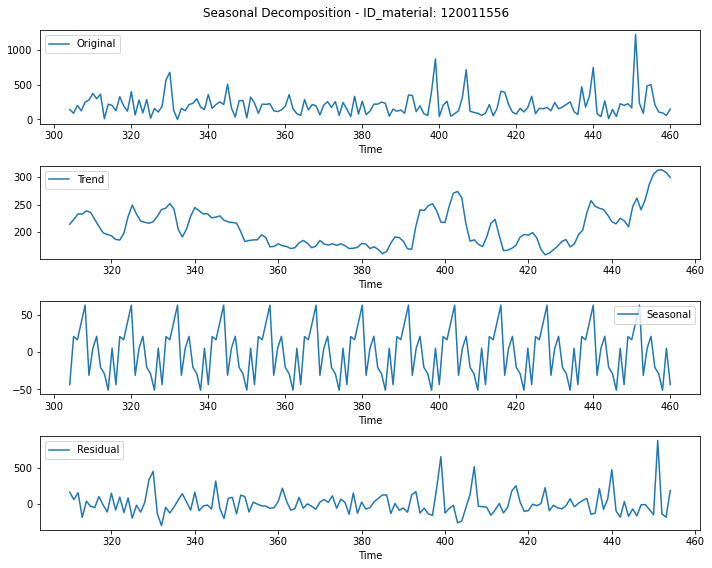

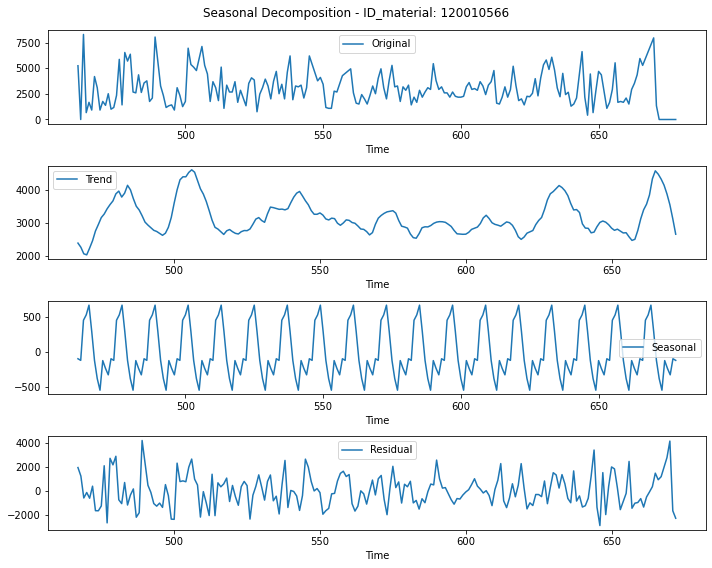

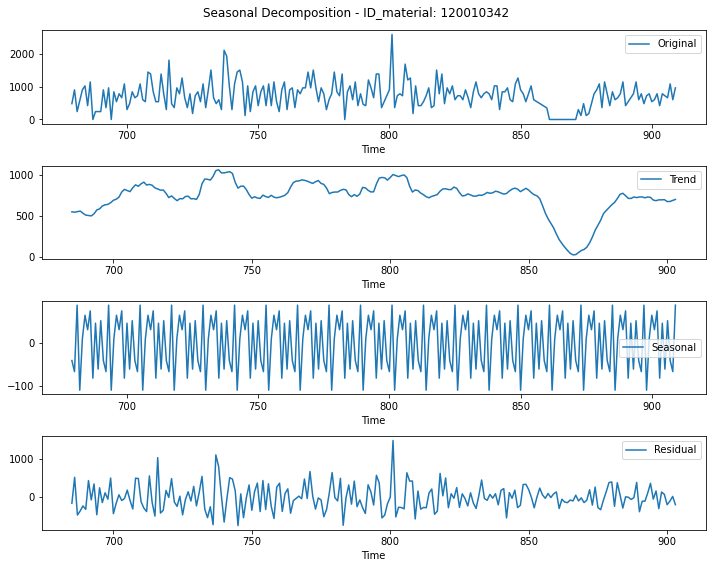

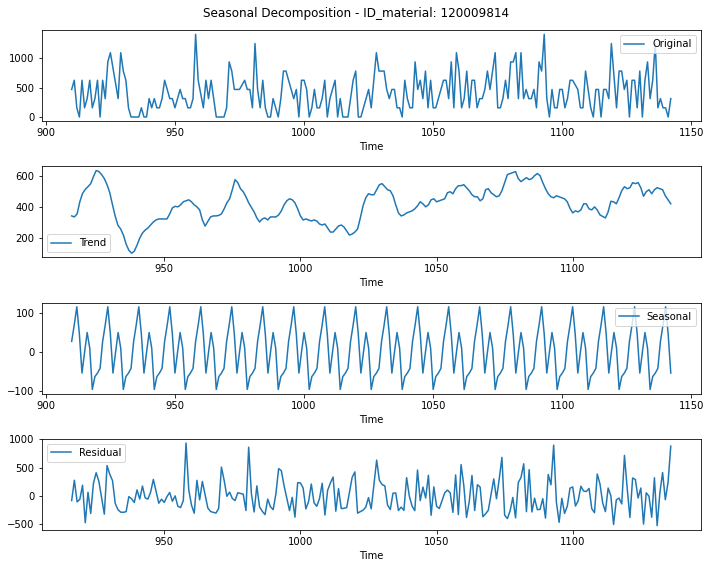

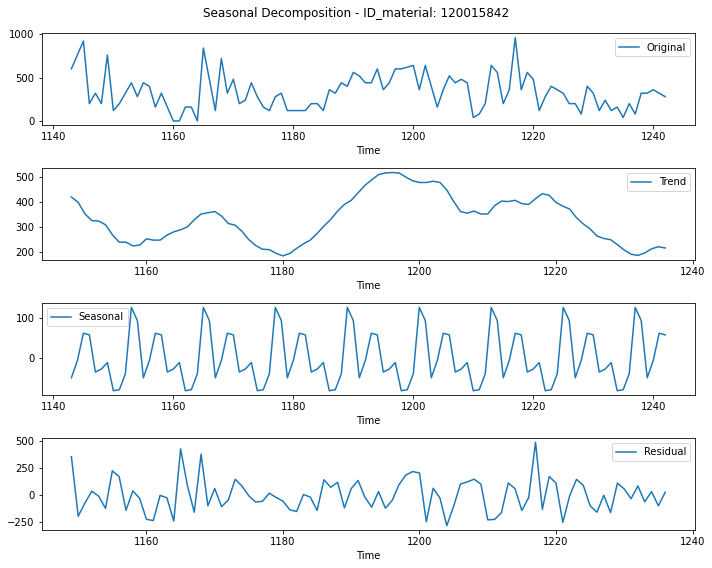

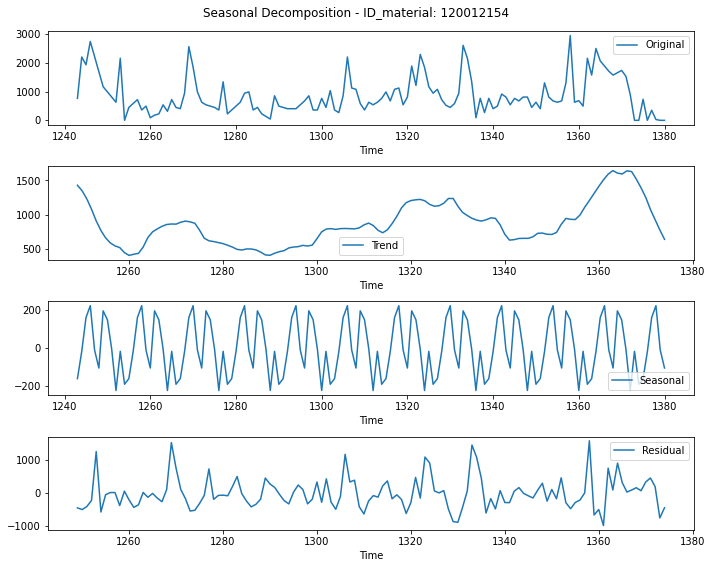

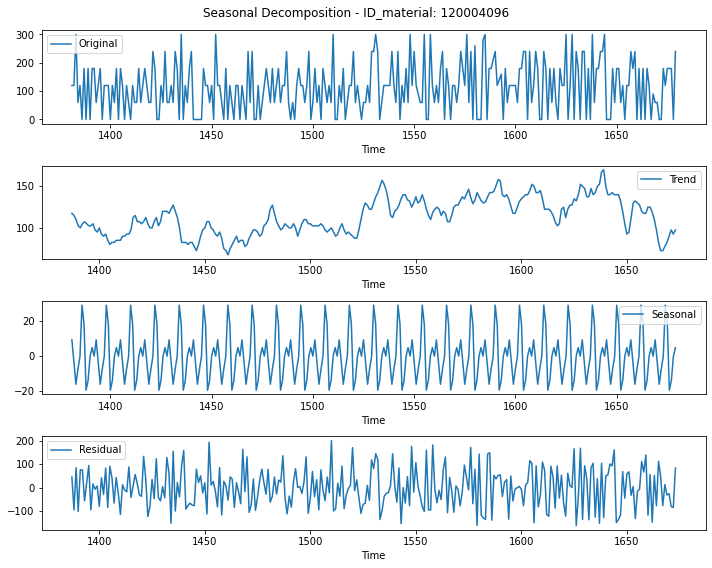

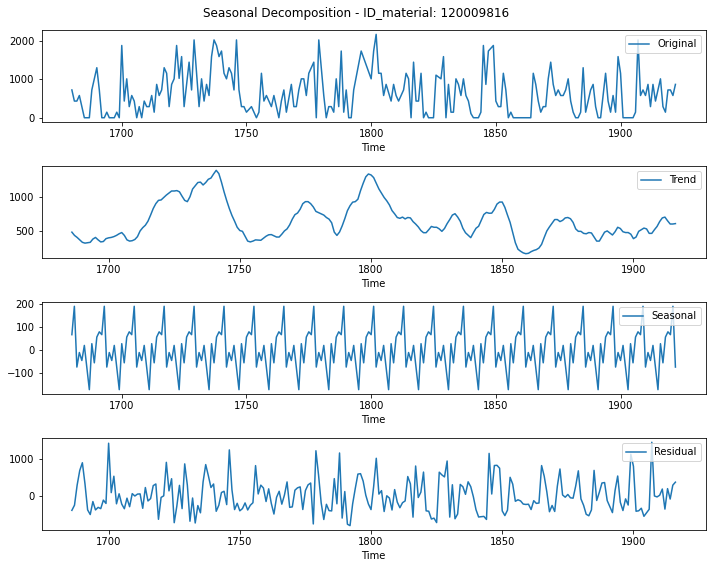

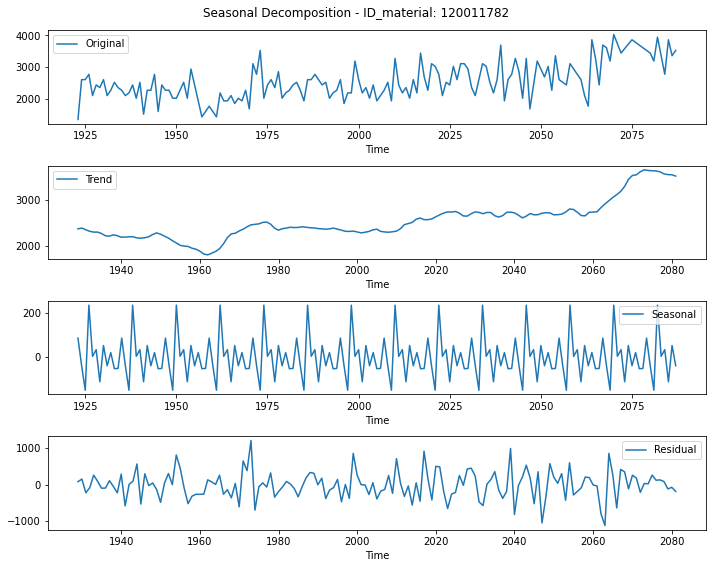

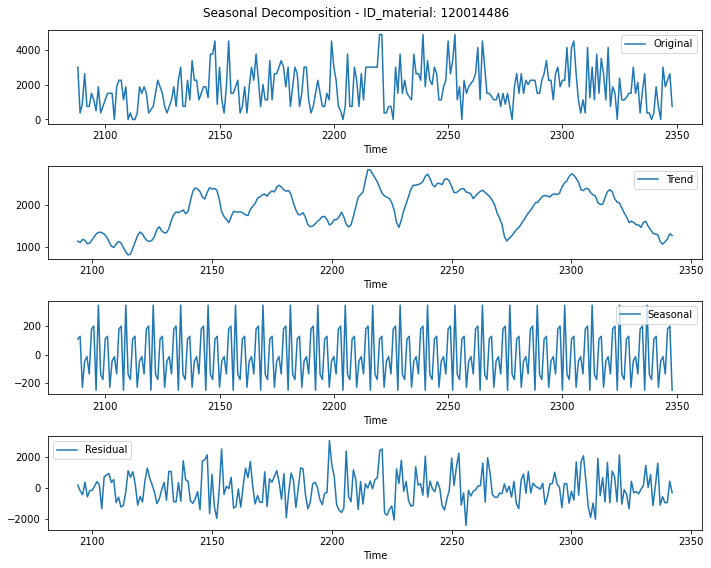

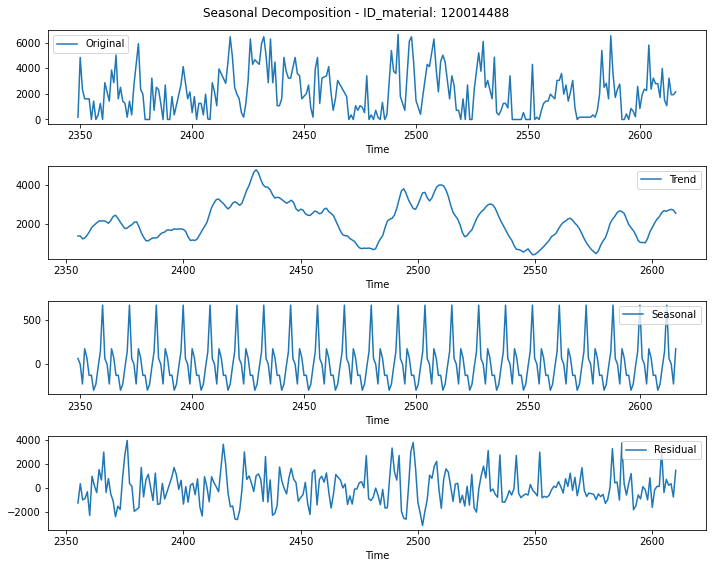

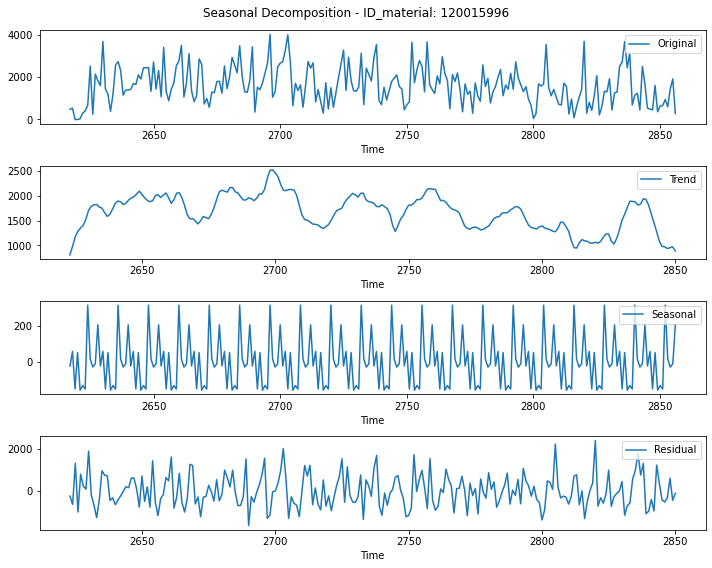

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the data from the Excel file
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Get unique ID_materials
unique_materials = data['ID_material'].unique()

# Iterate over each ID_material
for material in unique_materials:
    # Filter data for the current ID_material
    material_data = data[data['ID_material'] == material]

    # Extract the time series of units for the ID_material
    time_series = material_data['Units']

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(time_series, model='additive', period=12)  # Assuming a seasonal period of 12 months

    # Plot the decomposition components
    plt.figure(figsize=(10, 8))
    plt.subplot(411)
    plt.plot(time_series, label='Original')
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.suptitle(f"Seasonal Decomposition - ID_material: {material}")
    plt.tight_layout()
    plt.show()



In [203]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame called 'data' with columns 'ID_material' and 'Value'

# Group the data by ID_material
grouped_data = data.groupby('ID_material')

# Iterate over each group
for material_id, group in grouped_data:
    # Split the data into train and test sets for each ID_material
    train_data, test_data = train_test_split(group, test_size=0.2, random_state=42)

    # Print the ID_material and the shapes of the train and test sets
    print(f"ID_material: {material_id}")
    print(f"Train set shape: {train_data.shape}")
    print(f"Test set shape: {test_data.shape}")
    
    # Add unique names for train and test datasets
    train_data_name = f"Train dataset for ID_material {material_id}"
    test_data_name = f"Test dataset for ID_material {material_id}"
    
    # Print unique names for train and test datasets
    print(f"Train dataset name: {train_data_name}")
    print(f"Test dataset name: {test_data_name}")
    
    print('\n')


ID_material: 120004096
Train set shape: (239, 3)
Test set shape: (60, 3)
Train dataset name: Train dataset for ID_material 120004096
Test dataset name: Test dataset for ID_material 120004096


ID_material: 120009814
Train set shape: (186, 3)
Test set shape: (47, 3)
Train dataset name: Train dataset for ID_material 120009814
Test dataset name: Test dataset for ID_material 120009814


ID_material: 120009816
Train set shape: (194, 3)
Test set shape: (49, 3)
Train dataset name: Train dataset for ID_material 120009816
Test dataset name: Test dataset for ID_material 120009816


ID_material: 120010342
Train set shape: (184, 3)
Test set shape: (47, 3)
Train dataset name: Train dataset for ID_material 120010342
Test dataset name: Test dataset for ID_material 120010342


ID_material: 120010566
Train set shape: (174, 3)
Test set shape: (44, 3)
Train dataset name: Train dataset for ID_material 120010566
Test dataset name: Test dataset for ID_material 120010566


ID_material: 120010970
Train set sh

In [210]:
# Assuming you have a DataFrame called 'data' with columns 'ID_material', 'year_week', and 'Units'

# Group the data by ID_material
grouped_data = data.groupby('ID_material')

# Iterate over each group
for material_id, group in grouped_data:
    # Split the data into train and test sets for each ID_material
    train_data, test_data = train_test_split(group, test_size=0.2, random_state=42)

    # Filter train and test datasets for the current ID_material
    train_data = train_data[train_data['ID_material'] == material_id]
    test_data = test_data[test_data['ID_material'] == material_id]

    # Print the train and test datasets for the current ID_material
    print(f"Train Dataset for ID_material {material_id}:")
    print(train_data)
    print("\n")
    print(f"Test Dataset for ID_material {material_id}:")
    print(test_data)
    print("\n")


Train Dataset for ID_material 120004096:
     year_week  ID_material  Units
1387   2017-08    120004096  180.0
1564   2020-29    120004096  240.0
1566   2020-31    120004096  180.0
1527   2019-44    120004096  120.0
1411   2017-32    120004096  120.0
...        ...          ...    ...
1569   2020-34    120004096  120.0
1452   2018-21    120004096  300.0
1487   2019-04    120004096  240.0
1651   2022-11    120004096  180.0
1483   2018-52    120004096  180.0

[239 rows x 3 columns]


Test Dataset for ID_material 120004096:
     year_week  ID_material  Units
1662   2022-22    120004096    0.0
1646   2022-06    120004096    0.0
1545   2020-10    120004096   60.0
1390   2017-11    120004096    0.0
1458   2018-27    120004096    0.0
1659   2022-19    120004096  240.0
1474   2018-43    120004096    0.0
1490   2019-07    120004096   60.0
1386   2017-07    120004096    0.0
1554   2020-19    120004096   60.0
1478   2018-47    120004096  120.0
1576   2020-41    120004096  300.0
1565   2020-30    

<Figure size 720x720 with 0 Axes>

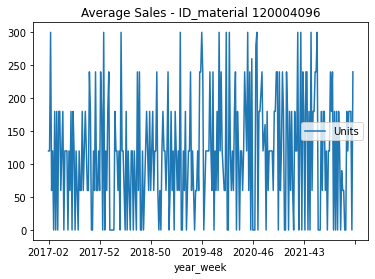

<Figure size 720x720 with 0 Axes>

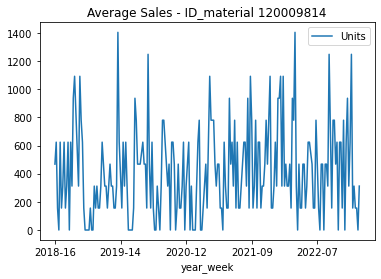

<Figure size 720x720 with 0 Axes>

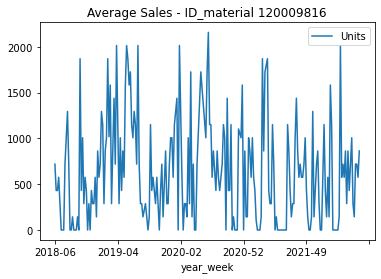

<Figure size 720x720 with 0 Axes>

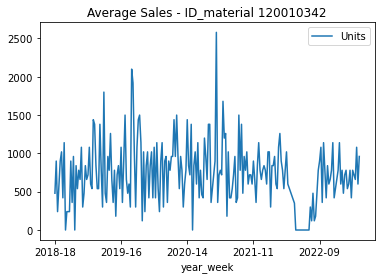

<Figure size 720x720 with 0 Axes>

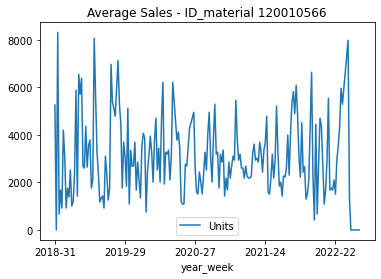

<Figure size 720x720 with 0 Axes>

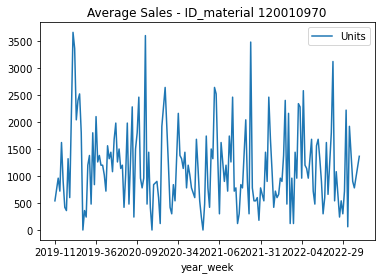

<Figure size 720x720 with 0 Axes>

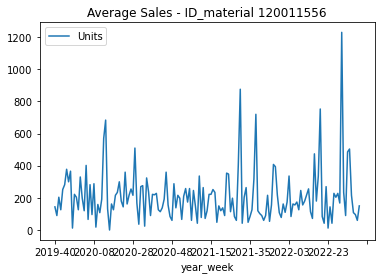

<Figure size 720x720 with 0 Axes>

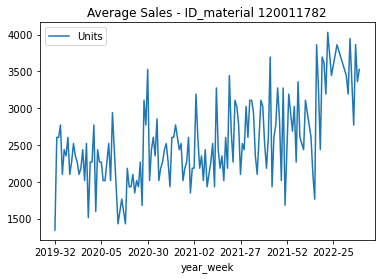

<Figure size 720x720 with 0 Axes>

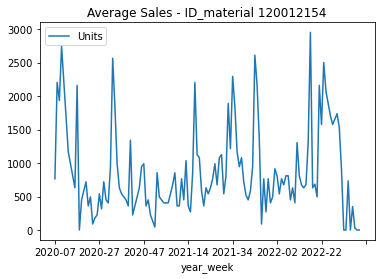

<Figure size 720x720 with 0 Axes>

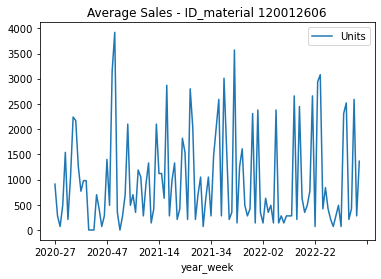

<Figure size 720x720 with 0 Axes>

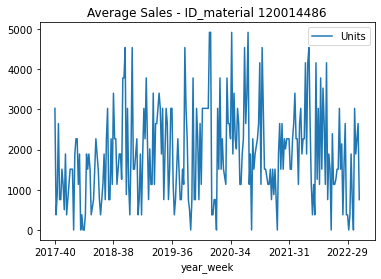

<Figure size 720x720 with 0 Axes>

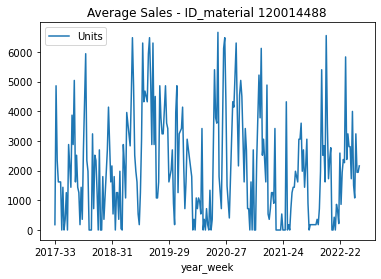

<Figure size 720x720 with 0 Axes>

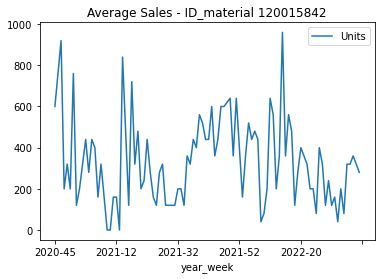

<Figure size 720x720 with 0 Axes>

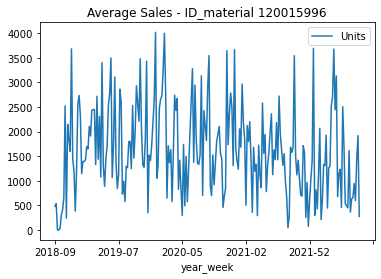

In [220]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original dataset
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Group the data by ID_material and calculate the average sales
average_sales = data.groupby('ID_material')['Units'].mean()

# Iterate over unique ID_material values and create plots
for material_id in average_sales.index:
    material_data = data[data['ID_material'] == material_id]
    
    # Plotting the average sales
    plt.figure(figsize=(10, 10))
    material_data.plot(x='year_week', y='Units', title=f'Average Sales - ID_material {material_id}')
    plt.show()


In [251]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Iterate over unique ID_material values
for material_id in merged_data['ID_material'].unique():
    # Filter data for the current ID_material
    material_data = merged_data[merged_data['ID_material'] == material_id]
    
    # Perform ADF test on the Units column
    result = adfuller(material_data['Units'])
    
    # Print results
    print(f"ID_material: {material_id}")
    print("ADF Statistic: %f" % result[0])
    print("p-value: %f" % result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print("\t%s: %.3f" % (key, value))
    
    # Determine stationarity based on p-value
    if result[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")
    
    print()


ID_material: 120010970
ADF Statistic: -9.342851
p-value: 0.000000
Critical Values:
	1%: -3.476
	5%: -2.882
	10%: -2.577
Stationary

ID_material: 120011556
ADF Statistic: -7.737197
p-value: 0.000000
Critical Values:
	1%: -3.489
	5%: -2.887
	10%: -2.580
Stationary

ID_material: 120010566
ADF Statistic: -6.344677
p-value: 0.000000
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576
Stationary

ID_material: 120010342
ADF Statistic: -3.007272
p-value: 0.034221
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575
Stationary

ID_material: 120009814
ADF Statistic: -7.691543
p-value: 0.000000
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575
Stationary

ID_material: 120004096
ADF Statistic: -19.486272
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
Stationary

ID_material: 120009816
ADF Statistic: -5.918338
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Stationary

ID_material: 120011782
ADF Statistic: -2.590642
p-value: 0.094947
Critical 

ID_material: 120004096 - Seasonality:
  - No significant seasonality
ID_material: 120009814 - Seasonality:
  - Weekly
ID_material: 120009816 - Seasonality:
  - Weekly
ID_material: 120010342 - Seasonality:
  - Weekly
ID_material: 120010566 - Seasonality:
  - Weekly
ID_material: 120010970 - Seasonality:
  - Weekly
ID_material: 120011556 - Seasonality:
  - No significant seasonality
ID_material: 120011782 - Seasonality:
  - Weekly
  - Monthly
ID_material: 120012154 - Seasonality:
  - Weekly
ID_material: 120012606 - Seasonality:
  - Monthly
ID_material: 120014486 - Seasonality:
  - Weekly
ID_material: 120014488 - Seasonality:
  - Weekly
ID_material: 120015842 - Seasonality:
  - Weekly
ID_material: 120015996 - Seasonality:
  - Weekly


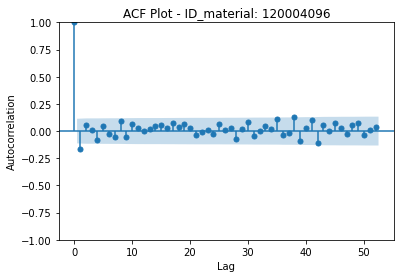

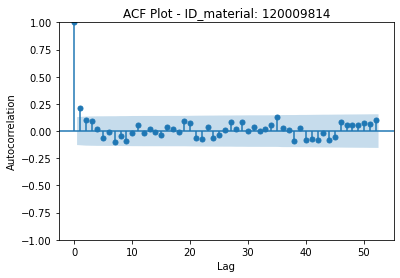

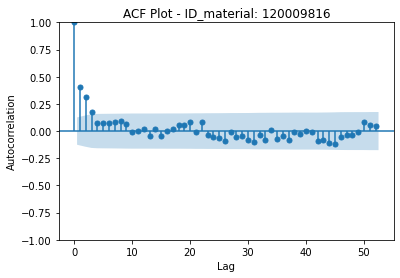

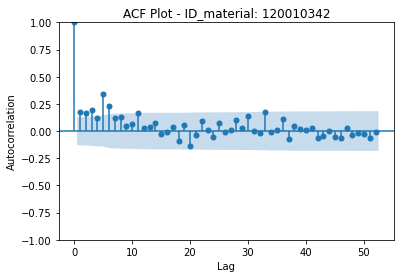

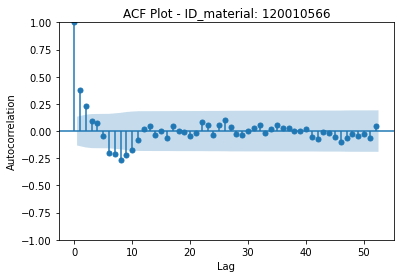

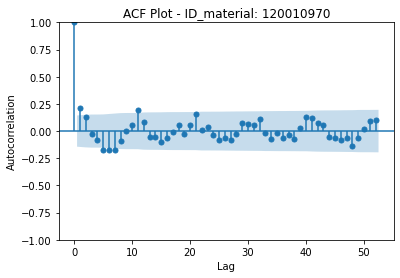

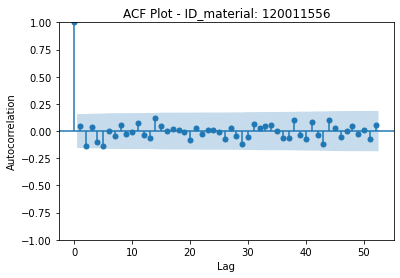

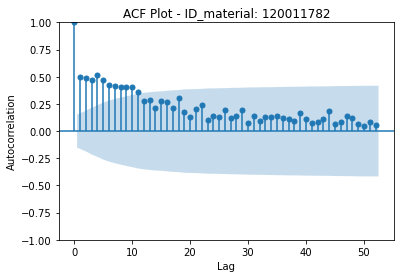

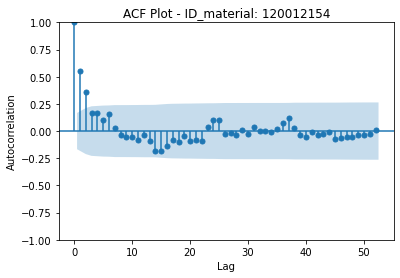

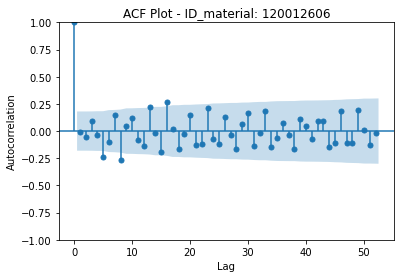

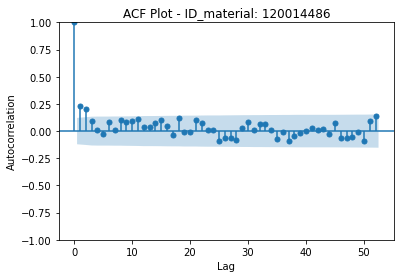

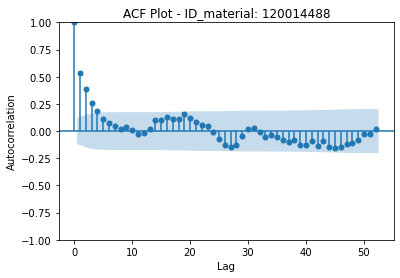

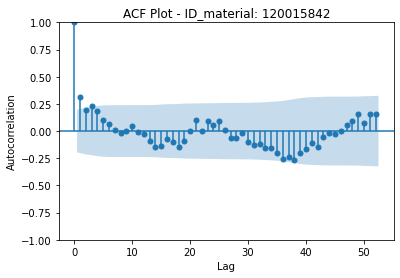

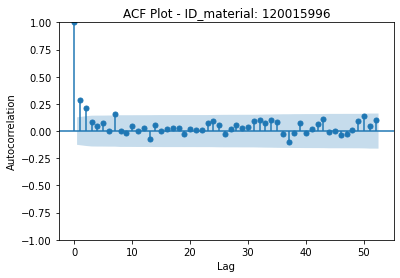

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

# Define the significance threshold for detecting seasonality
significance_threshold = 0.2

# Iterate over each ID_material
for material_id, group in data.groupby('ID_material'):
    # Extract time series data
    units = group['Units']

    # Plot ACF
    plot_acf(units, lags=52)  # Assuming weekly data with 52 weeks in a year
    plt.title(f"ACF Plot - ID_material: {material_id}")
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")

    # Calculate autocorrelation values
    acf_values = acf(units, nlags=52)

    # Check if there are significant spikes indicating seasonality
    weekly_seasonality = np.any(acf_values[1:8] > significance_threshold)
    monthly_seasonality = np.any(acf_values[8:36] > significance_threshold)
    yearly_seasonality = np.any(acf_values[36:] > significance_threshold)

    # Print the result
    print(f"ID_material: {material_id} - Seasonality:")
    if weekly_seasonality:
        print("  - Weekly")
    if monthly_seasonality:
        print("  - Monthly")
    if yearly_seasonality:
        print("  - Yearly")
    if not weekly_seasonality and not monthly_seasonality and not yearly_seasonality:
        print("  - No significant seasonality")




In [ ]:
ID_material: 120010970 
Best SARIMA parameters: (1, 0, 2) (1, 0, 0, 7)
Stationary
Seasonal: Weekly

ID_material: 120011556
Best ARIMA parameters: (0, 1, 2)
Stationary
No significant seasonality

ID_material: 120010566
SARIMA parameters: (0, 1, 2) (0, 0, 0, 7)
Stationary
Seasonal: Weekly

ID_material: 120010342
SARIMA parameters: (0, 0, 2) (1, 1, 1, 7)
Stationary
Seasonal: Weekly

ID_material: 120009814
SARIMA parameters: (2, 1, 2) (0, 0, 0, 7)
Stationary
Seasonal: Weekly

ID_material: 120004096
Best ARIMA parameters: (0, 0, 0)
Stationary
No significant seasonality

ID_material: 120009816
SARIMA parameters: (1, 1, 1) (0, 0, 1, 7)
Stationary
Seasonal: Weekly

ID_material: 120011782
SARIMA parameters: (0, 0, 2) (1, 0, 1, 12)
ARIMA parameters: (0, 0, 0)
Non-Stationary
Seasonal: Weekly, Monthly

ID_material: 120014486
SARIMA parameters: (2, 1, 1) (1, 0, 1, 7)
Stationary
Seasonal: Weekly

ID_material: 120014488
SARIMA parameters: (0, 1, 1) (1, 0, 1, 7)
Stationary
Seasonal: Weekly

ID_material: 120015996
SARIMA parameters: (2, 0, 2) (1, 0, 0, 7)
Stationary
Seasonal: Weekly

ID_material: 120012606
SARIMA parameters: (2, 0, 2) (0, 1, 1, 12)
Stationary
Seasonal: Monthly

ID_material: 120015842
SARIMA parameters: (2, 0, 2) (0, 0, 0, 7)
Stationary
Seasonal: Weekly

ID_material: 120012154
SARIMA parameters: (0, 0, 1) (1, 1, 1, 7)
Stationary
Seasonal: Weekly


In [ ]:
#MODELS

In [ ]:
#SARIMA

In [ ]:
ID_material: 120010970 
Best SARIMA parameters: (1, 0, 2) (1, 0, 0, 7)

In [266]:
import itertools

In [277]:
#Fitting the SARIMA

In [520]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Set the material ID for which you want to forecast the values
material_id = 120010970

# Filter the data for the specific material ID
material_data = data[data['ID_material'] == material_id]

# Prepare the data for SARIMA
# Assuming your data has a column named 'Date' containing the dates and a column named 'Units' containing the values
dates = material_data['year_week']
units = material_data['Units']

# Filter out zero values
non_zero_units = units[units != 0]

# Train the SARIMA model
order = (1, 2, 1)  # (p, d, q) - Autoregressive (AR) order, Integrated (I) order, Moving Average (MA) order
seasonal_order = (1, 0, 0, 7)  # (P, D, Q, S) - Seasonal AR order, Seasonal Integrated order, Seasonal MA order, Seasonal period
model = sm.tsa.statespace.SARIMAX(non_zero_units, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()


# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 2, 1), seasonal_order=(1, 0, 0, 7))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.15052D+00    |proj g|=  1.48225D-01

At iterate    5    f=  8.09764D+00    |proj g|=  2.50083D-02

At iterate   10    f=  8.08805D+00    |proj g|=  1.60232D-03

At iterate   15    f=  8.07997D+00    |proj g|=  3.43296D-02

At iterate   20    f=  8.06205D+00    |proj g|=  2.13595D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     27      1     0     0   8.926D-06   8.062D+00
  F =   8.0620473124631786     

CONVERG

In [523]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read the data from the Excel file
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Exclude zero values from the data
data_without_zeros = data[data['Units'] != 0]

# Filter the data for a specific ID
specific_id = 120010970
data_specific_id = data_without_zeros[data_without_zeros['ID_material'] == specific_id]

# Convert the index to DatetimeIndex
data_specific_id.index = pd.to_datetime(data_specific_id.index)

# Fit the ARIMA model
model = ARIMA(data_specific_id['Units'], order=(1, 0, 2), seasonal_order=(1, 0, 0, 7))
model_fit = model.fit()


# Forecast for the next two months
forecast = model_fit.forecast(steps=8)

# Get the predicted mean values
pred_mean = forecast

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean, squared=False)

# Print the forecasted values and evaluation metrics
print("Forecast:", pred_mean)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


Forecast: 183    1124.734283
184    1157.552880
185    1230.773073
186    1240.675981
187    1218.935378
188    1193.981104
189    1170.493783
190    1199.789875
Name: predicted_mean, dtype: float64
MAE: 396.3380875671169
MSE: 266384.8423393805
RMSE: 516.1248321282173


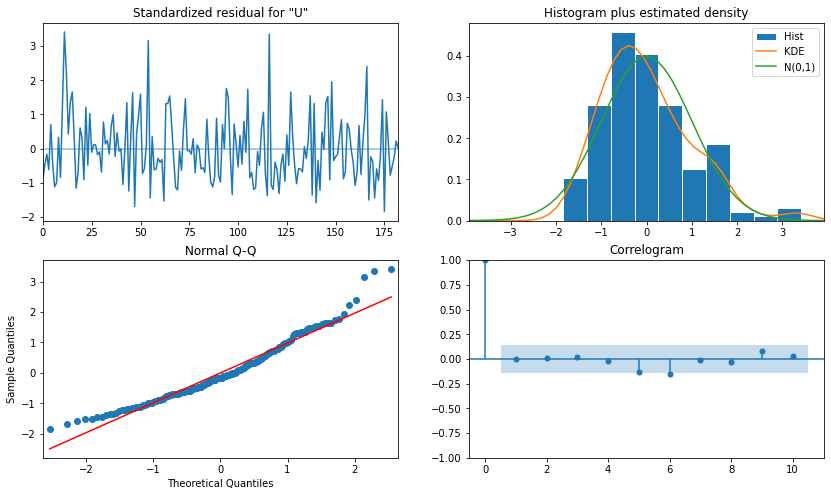

In [431]:
results = model_fit = model.fit()
results.plot_diagnostics(figsize=(14, 8))
plt.show()

In [ ]:
#120010566 (0, 1, 2) (0, 0, 0, 7)

In [506]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Set the material ID for which you want to forecast the values
material_id = 120010566

# Filter the data for the specific material ID
material_data = data[data['ID_material'] == material_id]

# Prepare the data for SARIMA
# Assuming your data has a column named 'Date' containing the dates and a column named 'Units' containing the values
dates = material_data['year_week']
units = material_data['Units']

# Filter out zero values
non_zero_units = units[units != 0]

# Train the SARIMA model
order = (0, 1, 2)  # (p, d, q) - Autoregressive (AR) order, Integrated (I) order, Moving Average (MA) order
seasonal_order = (0, 0, 0, 7)  # (P, D, Q, S) - Seasonal AR order, Seasonal Integrated order, Seasonal MA order, Seasonal period
model = sm.tsa.statespace.SARIMAX(non_zero_units, order=order, seasonal_order=seasonal_order)
model_fit1 = model.fit()


# Fit the ARIMA model
model1 = ARIMA(train_data, order=(0, 1, 2), seasonal_order=(0, 0, 0, 7))
model_fit1 = model.fit()

# Print the model summary
print(model_fit1.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.74643D+00    |proj g|=  6.89896D-02

At iterate    5    f=  8.70652D+00    |proj g|=  1.27827D-02

At iterate   10    f=  8.70068D+00    |proj g|=  2.92894D-04

At iterate   15    f=  8.70038D+00    |proj g|=  7.17352D-05

At iterate   20    f=  8.69952D+00    |proj g|=  5.97087D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   5.971D-06   8.700D+00
  F =   8.6995205038702004     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


In [509]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read the data from the Excel file
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Exclude zero values from the data
data_without_zeros = data[data['Units'] != 0]

# Filter the data for a specific ID
specific_id = 120010566
data_specific_id = data_without_zeros[data_without_zeros['ID_material'] == specific_id]

# Convert the index to DatetimeIndex
data_specific_id.index = pd.to_datetime(data_specific_id.index)

# Fit the ARIMA model
model = ARIMA(data_specific_id['Units'], order=(0, 1, 2), seasonal_order=(0, 0, 0, 7))
model_fit1 = model.fit()


# Forecast for the next two months
forecast = model_fit1.forecast(steps=8)

# Get the predicted mean values
pred_mean = forecast

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean, squared=False)

# Print the forecasted values and evaluation metrics
print("Forecast:", pred_mean)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)



Forecast: 210    2081.300483
211    3202.554395
212    3202.554395
213    3202.554395
214    3202.554395
215    3202.554395
216    3202.554395
217    3202.554395
Name: predicted_mean, dtype: float64
MAE: 3009.240942628364
MSE: 9970923.069273591
RMSE: 3157.6768468723317


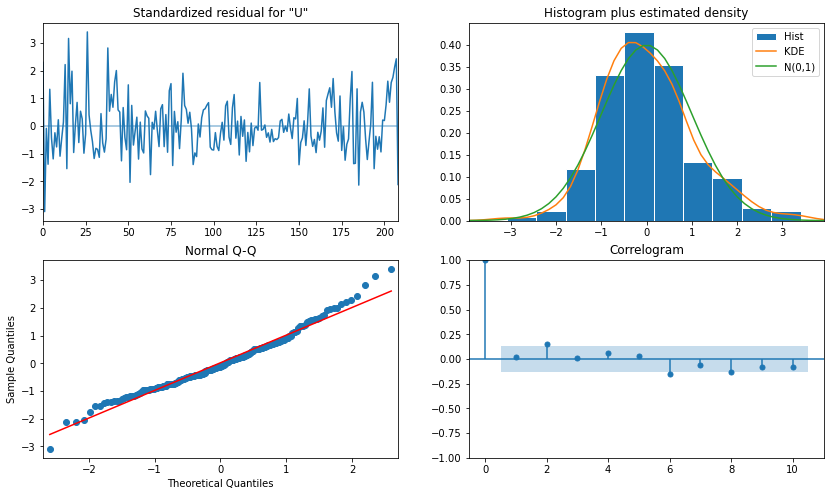

In [510]:
results = model_fit1
results.plot_diagnostics(figsize=(14, 8))
plt.show()

In [ ]:
#ID_material: 120010342
SARIMA parameters: (2, 1, 2) (1, 1, 1, 7)
Stationary
Seasonal: Weekly

In [501]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the data from the Excel file
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Set the material ID for which you want to forecast the values
material_id = 120010342

# Filter the data for the specific material ID
material_data = data[data['ID_material'] == material_id]

# Prepare the data for SARIMA
# Assuming your data has a column named 'Date' containing the dates and a column named 'Units' containing the values
dates = material_data['year_week']
units = material_data['Units']

# Train the SARIMA model
order = (2,1,2)                             #((1, 0, 2), (1, 1, 1, 7)
seasonal_order = (1,1,1,7)                           # Assuming a seasonal period of weekly
model = sm.tsa.statespace.SARIMAX(units, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Forecast the values for the next two months
forecast = model_fit.get_forecast(steps=8)  #forecasting for the next 8 weeks 
forecast_values = forecast.predicted_mean

# Print the forecasted values
print("Forecasted values for Material ID {}: ".format(material_id))
print(forecast_values)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35328D+00    |proj g|=  1.30605D-01

At iterate    5    f=  7.29410D+00    |proj g|=  9.81910D-03

At iterate   10    f=  7.29108D+00    |proj g|=  1.57418D-03

At iterate   15    f=  7.28970D+00    |proj g|=  8.37574D-03


 This problem is unconstrained.



At iterate   20    f=  7.28713D+00    |proj g|=  5.19510D-03

At iterate   25    f=  7.28692D+00    |proj g|=  1.90283D-03

At iterate   30    f=  7.27799D+00    |proj g|=  3.65576D-02

At iterate   35    f=  7.19306D+00    |proj g|=  1.08472D-02

At iterate   40    f=  7.19262D+00    |proj g|=  6.21231D-03

At iterate   45    f=  7.19188D+00    |proj g|=  7.98540D-04

At iterate   50    f=  7.19183D+00    |proj g|=  1.64194D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   1.642D-03   7.192D+00
  F =   7.1918287343471947     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

In [502]:
import pandas as pd

# Load the data from Excel file
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Filter the data for Material ID 120010342
material_data = data[data['ID_material'] == 120010342]

# Extract the actual values for the forecasted periods
actual_values = material_data.tail(8)['Units'].values

# Print the actual values
print("Actual values for Material ID 120010342:")
print(actual_values)

Actual values for Material ID 120010342:
[ 780.  420.  780.  720.  660. 1080.  600.  960.]


In [503]:
import numpy as np

# Filter out zero values from actual values and forecast values
non_zero_indices = actual_values != 0
actual_values_non_zero = actual_values[non_zero_indices]
forecast_values_non_zero = forecast_values[non_zero_indices]

# Calculate the percentage error
percentage_error = (actual_values_non_zero - forecast_values_non_zero) / actual_values_non_zero * 100

# Calculate the accuracy percentage
accuracy = 100 - np.mean(np.abs(percentage_error))

# Print the accuracy percentage
print("Accuracy for Material ID 120010342: {:.2f}%".format(accuracy))

Accuracy for Material ID 120010342: 79.78%


In [504]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read the data from the Excel file
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Exclude zero values from the data
data_without_zeros = data[data['Units'] != 0]

# Filter the data for a specific ID
specific_id = 120010342
data_specific_id = data_without_zeros[data_without_zeros['ID_material'] == specific_id]

# Convert the index to DatetimeIndex
data_specific_id.index = pd.to_datetime(data_specific_id.index)

# Fit the ARIMA model
model = ARIMA(data_specific_id['Units'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 7))
model_fit2 = model.fit()


# Forecast for the next two months
forecast = model_fit2.forecast(steps=8)

# Get the predicted mean values
pred_mean = forecast

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean, squared=False)

# Print the forecasted values and evaluation metrics
print("Forecast:", pred_mean)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)




Forecast: 217    1003.898939
218     624.801096
219     664.356873
220     650.740536
221     699.103427
222     835.863452
223     662.971531
224     912.080277
Name: predicted_mean, dtype: float64
MAE: 125.96673203572321
MSE: 22204.734517642763
RMSE: 149.01253141143118


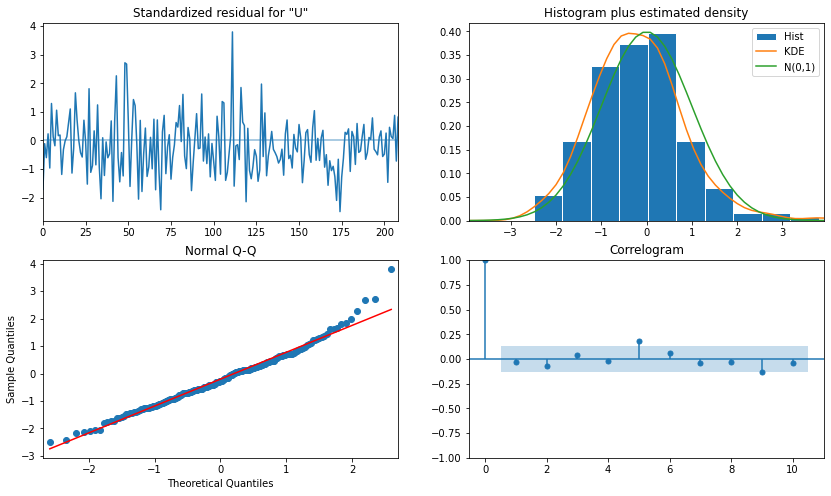

In [505]:
results = model_fit2
results.plot_diagnostics(figsize=(14, 8))
plt.show()

In [ ]:
#ID_material: 120009814
SARIMA parameters: (2, 1, 2) (0, 0, 0, 7)
Stationary
Seasonal: Weekly

In [529]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Set the material ID for which you want to forecast the values
material_id = 120009814

# Filter the data for the specific material ID
material_data = data[data['ID_material'] == material_id]

# Prepare the data for SARIMA
# Assuming your data has a column named 'Date' containing the dates and a column named 'Units' containing the values
dates = material_data['year_week']
units = material_data['Units']

# Filter out zero values
non_zero_units = units[units != 0]

# Train the SARIMA model
order = (1, 0, 2)  # (p, d, q) - Autoregressive (AR) order, Integrated (I) order, Moving Average (MA) order
seasonal_order = (0, 1, 0, 7)  # (P, D, Q, S) - Seasonal AR order, Seasonal Integrated order, Seasonal MA order, Seasonal period
model = sm.tsa.statespace.SARIMAX(non_zero_units, order=order, seasonal_order=seasonal_order)
model_fit3 = model.fit()


# Fit the ARIMA model
model3 = ARIMA(train_data, order=(1, 0, 2), seasonal_order=(0, 1, 0, 7))
model_fit3 = model.fit()

# Print the model summary
print(model_fit3.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17454D+00    |proj g|=  4.66447D-03

At iterate    5    f=  7.17428D+00    |proj g|=  1.38081D-02

At iterate   10    f=  7.17396D+00    |proj g|=  8.67297D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   8.673D-06   7.174D+00
  F =   7.1739554148589590     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


In [525]:
import pandas as pd

# Load the data from Excel file
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Filter the data for Material ID 120010342
material_data = data[data['ID_material'] == 120009814]

# Extract the actual values for the forecasted periods
actual_values = material_data.tail(8)['Units'].values

# Print the actual values
print("Actual values for Material ID 120009814:")
print(actual_values)

Actual values for Material ID 120009814:
[ 624. 1248.  156.  312.  156.  156.    0.  312.]


In [447]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read the data from the Excel file
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Exclude zero values from the data
data_without_zeros = data[data['Units'] != 0]

# Filter the data for a specific ID
specific_id = 120009814
data_specific_id = data_without_zeros[data_without_zeros['ID_material'] == specific_id]

# Convert the index to DatetimeIndex
data_specific_id.index = pd.to_datetime(data_specific_id.index)

# Fit the ARIMA model
model = ARIMA(data_specific_id['Units'], order=(2, 1, 2), seasonal_order=(0, 0, 0, 7))
model_fit3 = model.fit()


# Forecast for the next two months
forecast = model_fit3.forecast(steps=8)

# Get the predicted mean values
pred_mean = forecast

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean, squared=False)

# Print the forecasted values and evaluation metrics
print("Forecast:", pred_mean)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)





Forecast: 202    456.280024
203    486.035728
204    473.795338
205    487.577072
206    474.146942
207    487.416385
208    474.324034
209    487.243477
Name: predicted_mean, dtype: float64
MAE: 296.8946084249815
MSE: 127169.49949807063
RMSE: 356.60832785854933


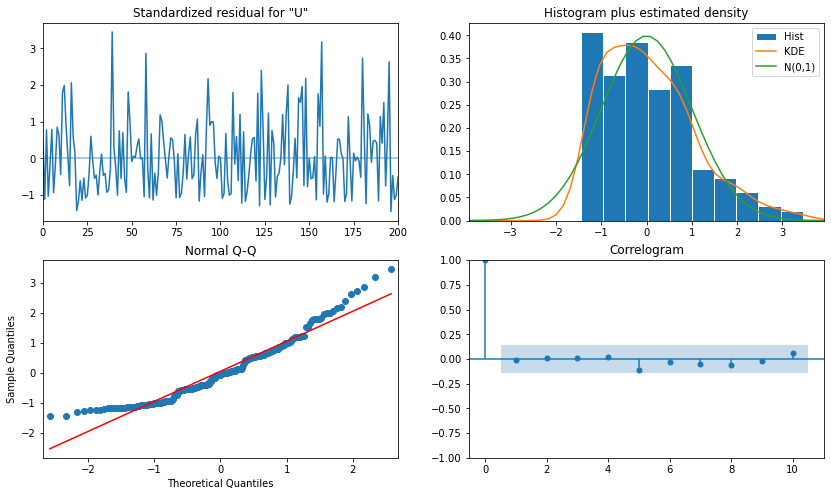

In [448]:
results = model_fit3
results.plot_diagnostics(figsize=(14, 8))
plt.show()

In [ ]:
#ID_material: 120009816
SARIMA parameters: (1, 1, 1) (0, 0, 1, 7)
Stationary
Seasonal: Weekly

In [450]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Set the material ID for which you want to forecast the values
material_id = 120009816

# Filter the data for the specific material ID
material_data = data[data['ID_material'] == material_id]

# Prepare the data for SARIMA
# Assuming your data has a column named 'Date' containing the dates and a column named 'Units' containing the values
dates = material_data['year_week']
units = material_data['Units']

# Filter out zero values
non_zero_units = units[units != 0]

# Train the SARIMA model
order = (1, 1, 1)  # (p, d, q) - Autoregressive (AR) order, Integrated (I) order, Moving Average (MA) order
seasonal_order = (0, 0, 1, 7)  # (P, D, Q, S) - Seasonal AR order, Seasonal Integrated order, Seasonal MA order, Seasonal period
model = sm.tsa.statespace.SARIMAX(non_zero_units, order=order, seasonal_order=seasonal_order)
model_fit4 = model.fit()


# Fit the ARIMA model
model4 = ARIMA(train_data, order=(1, 1, 1), seasonal_order=(0, 0, 1, 7))
model_fit4 = model.fit()

# Print the model summary
print(model_fit4.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.61448D+00    |proj g|=  7.20853D-02

At iterate    5    f=  7.59011D+00    |proj g|=  1.83794D-02

At iterate   10    f=  7.58374D+00    |proj g|=  1.49060D-02

At iterate   15    f=  7.58254D+00    |proj g|=  4.39332D-04

At iterate   20    f=  7.58245D+00    |proj g|=  3.75564D-03

At iterate   25    f=  7.57843D+00    |proj g|=  3.26919D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     33      1     0     0   

 This problem is unconstrained.


In [451]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read the data from the Excel file
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Exclude zero values from the data
data_without_zeros = data[data['Units'] != 0]

# Filter the data for a specific ID
specific_id = 120009816
data_specific_id = data_without_zeros[data_without_zeros['ID_material'] == specific_id]

# Convert the index to DatetimeIndex
data_specific_id.index = pd.to_datetime(data_specific_id.index)

# Fit the ARIMA model
model = ARIMA(data_specific_id['Units'], order=(1, 1, 1), seasonal_order=(0, 0, 1, 7))
model_fit4 = model.fit()


# Forecast for the next two months
forecast = model_fit4.forecast(steps=8)

# Get the predicted mean values
pred_mean = forecast

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean, squared=False)

# Print the forecasted values and evaluation metrics
print("Forecast:", pred_mean)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Forecast: 199    820.011146
200    773.607491
201    762.172116
202    785.415537
203    783.891835
204    778.668068
205    789.945490
206    787.629049
Name: predicted_mean, dtype: float64
MAE: 232.85845645331753
MSE: 95040.55846055514
RMSE: 308.28648763861696


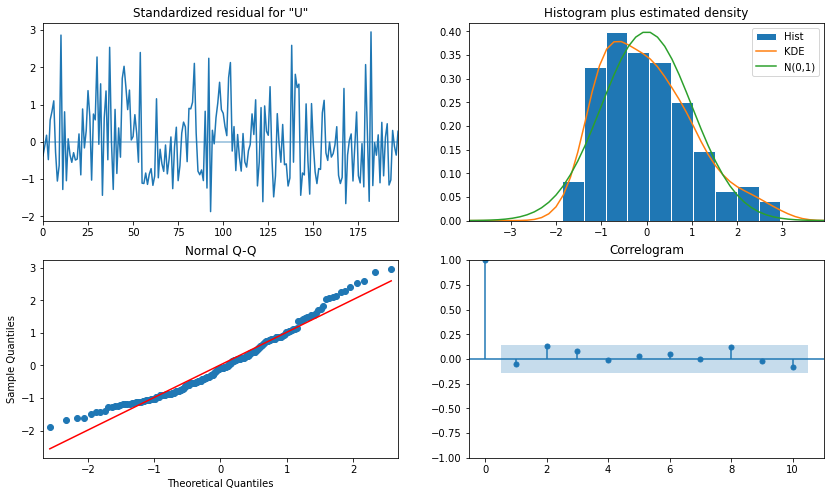

In [452]:
results = model_fit4
results.plot_diagnostics(figsize=(14, 8))
plt.show()

In [ ]:
#ID_material: 120014486
SARIMA parameters: (2, 1, 1) (1, 0, 1, 7)
Stationary
Seasonal: Weekly

In [453]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Set the material ID for which you want to forecast the values
material_id = 120014486

# Filter the data for the specific material ID
material_data = data[data['ID_material'] == material_id]

# Prepare the data for SARIMA
# Assuming your data has a column named 'Date' containing the dates and a column named 'Units' containing the values
dates = material_data['year_week']
units = material_data['Units']

# Filter out zero values
non_zero_units = units[units != 0]

# Train the SARIMA model
order = (2, 1, 1)  # (p, d, q) - Autoregressive (AR) order, Integrated (I) order, Moving Average (MA) order
seasonal_order = (1, 0, 1, 7)  # (P, D, Q, S) - Seasonal AR order, Seasonal Integrated order, Seasonal MA order, Seasonal period
model = sm.tsa.statespace.SARIMAX(non_zero_units, order=order, seasonal_order=seasonal_order)
model_fit5 = model.fit()


# Fit the ARIMA model
model5 = ARIMA(train_data, order=(2, 1, 1), seasonal_order=(1, 0, 1, 7))
model_fit5 = model.fit()

# Print the model summary
print(model_fit5.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41736D+00    |proj g|=  9.23454D-02

At iterate    5    f=  8.36884D+00    |proj g|=  1.56928D-02

At iterate   10    f=  8.36516D+00    |proj g|=  7.43885D-04

At iterate   15    f=  8.36481D+00    |proj g|=  8.60808D-03

At iterate   20    f=  8.36465D+00    |proj g|=  1.77664D-04

At iterate   25    f=  8.36457D+00    |proj g|=  3.73883D-03

At iterate   30    f=  8.35791D+00    |proj g|=  5.08252D-03


 This problem is unconstrained.



At iterate   35    f=  8.35777D+00    |proj g|=  1.59393D-04

At iterate   40    f=  8.35774D+00    |proj g|=  4.71381D-03

At iterate   45    f=  8.35736D+00    |proj g|=  8.04788D-03

At iterate   50    f=  8.35729D+00    |proj g|=  4.54184D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58      1     0     0   4.542D-04   8.357D+00
  F =   8.3572901390354062     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  8.36481D+00    |proj g|=  8.60808D-03

At iterate   20    f=  8.36465D+00    |proj g|=  1.77664D-04

At iterate   25    f=  8.36457D+00    |proj g|=  3.73883D-03

At iterate   30    f=  8.35791D+00    |proj g|=  5.08252D-03

At iterate   35    f=  8.35777D+00    |proj g|=  1.59393D-04

At iterate   40    f=  8.35774D+00    |proj g|=  4.71381D-03

At iterate   45    f=  8.35736D+00    |proj g|=  8.04788D-03

At iterate   50    f=  8.35729D+00    |proj g|=  4.54184D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58      1     0     0   4.542D-04   8.357D+00
  F =   8.35729013903

In [454]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read the data from the Excel file
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Exclude zero values from the data
data_without_zeros = data[data['Units'] != 0]

# Filter the data for a specific ID
specific_id = 120014486
data_specific_id = data_without_zeros[data_without_zeros['ID_material'] == specific_id]

# Convert the index to DatetimeIndex
data_specific_id.index = pd.to_datetime(data_specific_id.index)

# Fit the ARIMA model
model = ARIMA(data_specific_id['Units'], order=(2, 1, 1), seasonal_order=(1, 0, 1, 7))
model_fit5 = model.fit()


# Forecast for the next two months
forecast = model_fit5.forecast(steps=8)

# Get the predicted mean values
pred_mean = forecast

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean, squared=False)

# Print the forecasted values and evaluation metrics
print("Forecast:", pred_mean)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Forecast: 250    1827.684769
251    1708.641986
252    1836.843452
253    1793.741081
254    1852.884703
255    1932.868954
256    1864.635909
257    1867.442540
Name: predicted_mean, dtype: float64
MAE: 775.8997660856576
MSE: 846970.120031811
RMSE: 920.3097956839376


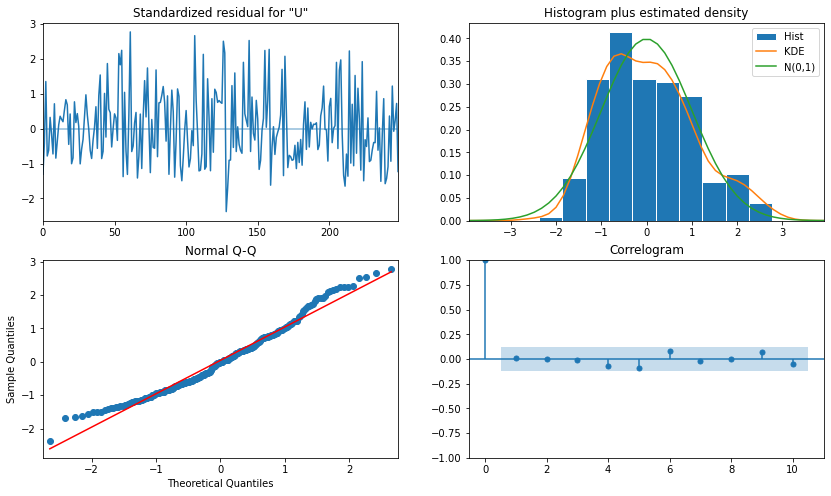

In [455]:
results = model_fit5
results.plot_diagnostics(figsize=(14, 8))
plt.show()

In [ ]:
#ID_material: 120014488
SARIMA parameters: (0, 1, 1) (1, 0, 1, 7)
Stationary
Seasonal: Weekly

In [456]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Set the material ID for which you want to forecast the values
material_id = 120014488

# Filter the data for the specific material ID
material_data = data[data['ID_material'] == material_id]

# Prepare the data for SARIMA
# Assuming your data has a column named 'Date' containing the dates and a column named 'Units' containing the values
dates = material_data['year_week']
units = material_data['Units']

# Filter out zero values
non_zero_units = units[units != 0]

# Train the SARIMA model
order = (0, 1, 1)  # (p, d, q) - Autoregressive (AR) order, Integrated (I) order, Moving Average (MA) order
seasonal_order = (1, 0, 1, 7)  # (P, D, Q, S) - Seasonal AR order, Seasonal Integrated order, Seasonal MA order, Seasonal period
model = sm.tsa.statespace.SARIMAX(non_zero_units, order=order, seasonal_order=seasonal_order)
model_fit6 = model.fit()


# Fit the ARIMA model
model6 = ARIMA(train_data, order=(0, 1, 1), seasonal_order=(1, 0, 1, 7))
model_fit6 = model.fit()

# Print the model summary
print(model_fit6.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.72891D+00    |proj g|=  8.68525D-02

At iterate    5    f=  8.71610D+00    |proj g|=  1.02668D-02

At iterate   10    f=  8.70903D+00    |proj g|=  6.83139D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     16      1     0     0   1.881D-05   8.709D+00
  F =   8.7090314742202448     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


In [457]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read the data from the Excel file
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Exclude zero values from the data
data_without_zeros = data[data['Units'] != 0]

# Filter the data for a specific ID
specific_id = 120014488
data_specific_id = data_without_zeros[data_without_zeros['ID_material'] == specific_id]

# Convert the index to DatetimeIndex
data_specific_id.index = pd.to_datetime(data_specific_id.index)

# Fit the ARIMA model
model = ARIMA(data_specific_id['Units'], order=(0, 1, 1), seasonal_order=(1, 0, 1, 7))
model_fit6 = model.fit()


# Forecast for the next two months
forecast = model_fit6.forecast(steps=8)

# Get the predicted mean values
pred_mean = forecast

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean, squared=False)

# Print the forecasted values and evaluation metrics
print("Forecast:", pred_mean)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Forecast: 233    1948.314752
234    2709.018548
235    2404.057062
236    1987.275128
237    2135.744448
238    2178.624391
239    1956.036208
240    2236.774934
Name: predicted_mean, dtype: float64
MAE: 591.7899347799978
MSE: 575530.2495661197
RMSE: 758.6371000459441


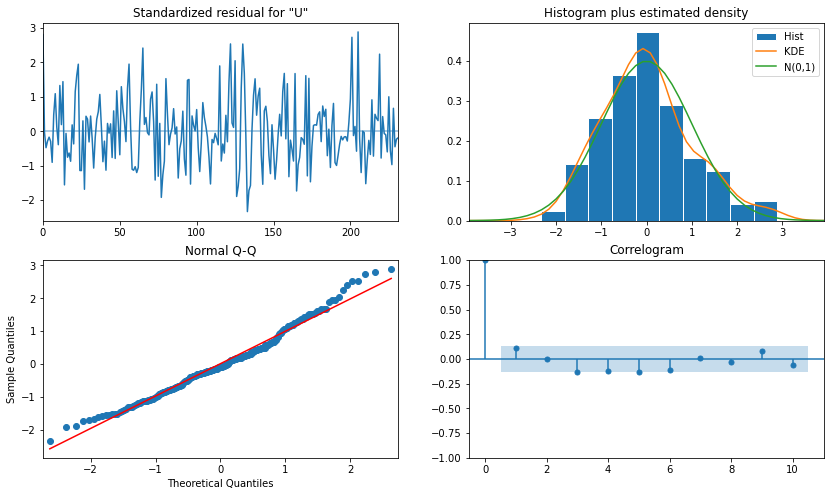

In [458]:
results = model_fit6
results.plot_diagnostics(figsize=(14, 8))
plt.show()

In [ ]:
#ID_material: 120015996
SARIMA parameters: (2, 0, 2) (1, 0, 0, 7)
Stationary
Seasonal: Weekly

In [460]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Set the material ID for which you want to forecast the values
material_id = 120015996

# Filter the data for the specific material ID
material_data = data[data['ID_material'] == material_id]

# Prepare the data for SARIMA
# Assuming your data has a column named 'Date' containing the dates and a column named 'Units' containing the values
dates = material_data['year_week']
units = material_data['Units']

# Filter out zero values
non_zero_units = units[units != 0]

# Train the SARIMA model
order = (2, 0, 2)  # (p, d, q) - Autoregressive (AR) order, Integrated (I) order, Moving Average (MA) order
seasonal_order = (1, 0, 0, 7)  # (P, D, Q, S) - Seasonal AR order, Seasonal Integrated order, Seasonal MA order, Seasonal period
model = sm.tsa.statespace.SARIMAX(non_zero_units, order=order, seasonal_order=seasonal_order)
model_fit7 = model.fit()


# Fit the ARIMA model
model7 = ARIMA(train_data, order=(2, 0, 2), seasonal_order=(1, 0, 0, 7))
model_fit7 = model.fit()

# Print the model summary
print(model_fit7.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.42530D+00    |proj g|=  1.46753D-01

At iterate    5    f=  8.18986D+00    |proj g|=  4.46904D-02

At iterate   10    f=  8.18616D+00    |proj g|=  2.47926D-03

At iterate   15    f=  8.18543D+00    |proj g|=  2.66013D-02

At iterate   20    f=  8.17039D+00    |proj g|=  1.57269D-02

At iterate   25    f=  8.16345D+00    |proj g|=  5.29558D-03

At iterate   30    f=  8.16321D+00    |proj g|=  3.04651D-03

At iterate   35    f=  8.16238D+00    |proj g|=  5.79964D-03


 This problem is unconstrained.



At iterate   40    f=  8.16224D+00    |proj g|=  1.44222D-04

At iterate   45    f=  8.16223D+00    |proj g|=  1.08956D-03

At iterate   50    f=  8.16182D+00    |proj g|=  1.09445D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61      1     0     0   1.094D-02   8.162D+00
  F =   8.1618209746471049     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.42530D+00    |proj g|=  1.46753D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  8.18616D+00    |proj g|=  2.47926D-03

At iterate   15    f=  8.18543D+00    |proj g|=  2.66013D-02

At iterate   20    f=  8.17039D+00    |proj g|=  1.57269D-02

At iterate   25    f=  8.16345D+00    |proj g|=  5.29558D-03

At iterate   30    f=  8.16321D+00    |proj g|=  3.04651D-03

At iterate   35    f=  8.16238D+00    |proj g|=  5.79964D-03

At iterate   40    f=  8.16224D+00    |proj g|=  1.44222D-04

At iterate   45    f=  8.16223D+00    |proj g|=  1.08956D-03

At iterate   50    f=  8.16182D+00    |proj g|=  1.09445D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61   

In [461]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read the data from the Excel file
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Exclude zero values from the data
data_without_zeros = data[data['Units'] != 0]

# Filter the data for a specific ID
specific_id = 120015996
data_specific_id = data_without_zeros[data_without_zeros['ID_material'] == specific_id]

# Convert the index to DatetimeIndex
data_specific_id.index = pd.to_datetime(data_specific_id.index)

# Fit the ARIMA model
model = ARIMA(data_specific_id['Units'], order=(2, 0, 2), seasonal_order=(1, 0, 0, 7))
model_fit7 = model.fit()


# Forecast for the next two months
forecast = model_fit7.forecast(steps=8)

# Get the predicted mean values
pred_mean = forecast

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean, squared=False)

# Print the forecasted values and evaluation metrics
print("Forecast:", pred_mean)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Forecast: 238    1188.995203
239    1219.762472
240    1455.935891
241    1412.416754
242    1591.191683
243    1684.394058
244    1370.588649
245    1546.103131
Name: predicted_mean, dtype: float64
MAE: 714.526317703503
MSE: 603557.3505345928
RMSE: 776.8895356063131


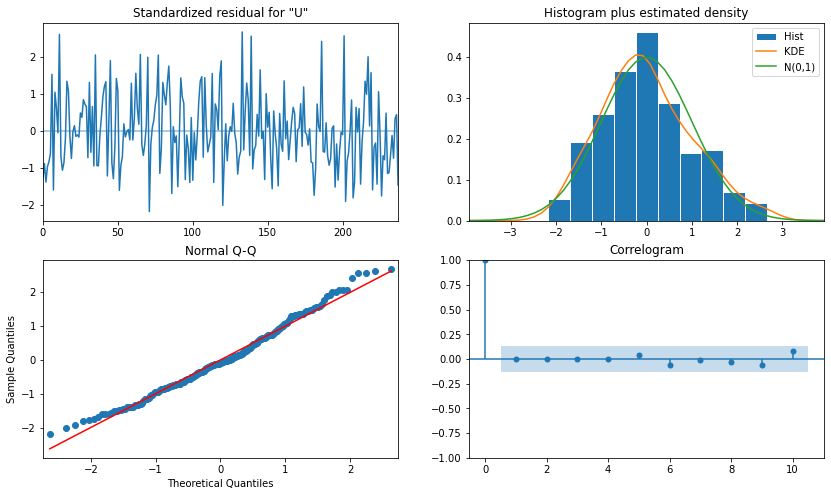

In [462]:
results = model_fit7
results.plot_diagnostics(figsize=(14, 8))
plt.show()

In [ ]:
#ID_material: 120012606
SARIMA parameters: (2, 0, 2) (0, 1, 1, 12)
Stationary
Seasonal: Monthly



In [463]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Set the material ID for which you want to forecast the values
material_id = 120012606

# Filter the data for the specific material ID
material_data = data[data['ID_material'] == material_id]

# Prepare the data for SARIMA
# Assuming your data has a column named 'Date' containing the dates and a column named 'Units' containing the values
dates = material_data['year_week']
units = material_data['Units']

# Filter out zero values
non_zero_units = units[units != 0]

# Train the SARIMA model
order = (2, 0, 2)  # (p, d, q) - Autoregressive (AR) order, Integrated (I) order, Moving Average (MA) order
seasonal_order = (0, 1, 1, 12)  # (P, D, Q, S) - Seasonal AR order, Seasonal Integrated order, Seasonal MA order, Seasonal period
model = sm.tsa.statespace.SARIMAX(non_zero_units, order=order, seasonal_order=seasonal_order)
model_fit8 = model.fit()


# Fit the ARIMA model
model8 = ARIMA(train_data, order=(2, 0, 2), seasonal_order=(0, 1, 1, 12))
model_fit8 = model.fit()

# Print the model summary
print(model_fit8.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.58525D+00    |proj g|=  3.31936D-02

At iterate    5    f=  7.58066D+00    |proj g|=  2.03328D-02

At iterate   10    f=  7.57353D+00    |proj g|=  1.02440D-01

At iterate   15    f=  7.56359D+00    |proj g|=  4.22814D-02


 This problem is unconstrained.



At iterate   20    f=  7.54749D+00    |proj g|=  2.32740D-02

At iterate   25    f=  7.54537D+00    |proj g|=  1.42311D-02

At iterate   30    f=  7.54301D+00    |proj g|=  4.83459D-02

At iterate   35    f=  7.54123D+00    |proj g|=  3.66966D-02

At iterate   40    f=  7.54065D+00    |proj g|=  4.40926D-03

At iterate   45    f=  7.54065D+00    |proj g|=  1.35258D-03

At iterate   50    f=  7.54059D+00    |proj g|=  3.61763D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61      1     0     0   3.618D-02   7.541D+00
  F =   7.5405947867553644     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   10    f=  7.57353D+00    |proj g|=  1.02440D-01

At iterate   15    f=  7.56359D+00    |proj g|=  4.22814D-02

At iterate   20    f=  7.54749D+00    |proj g|=  2.32740D-02

At iterate   25    f=  7.54537D+00    |proj g|=  1.42311D-02

At iterate   30    f=  7.54301D+00    |proj g|=  4.83459D-02

At iterate   35    f=  7.54123D+00    |proj g|=  3.66966D-02

At iterate   40    f=  7.54065D+00    |proj g|=  4.40926D-03

At iterate   45    f=  7.54065D+00    |proj g|=  1.35258D-03

At iterate   50    f=  7.54059D+00    |proj g|=  3.61763D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61   

In [464]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read the data from the Excel file
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Exclude zero values from the data
data_without_zeros = data[data['Units'] != 0]

# Filter the data for a specific ID
specific_id = 120012606
data_specific_id = data_without_zeros[data_without_zeros['ID_material'] == specific_id]

# Convert the index to DatetimeIndex
data_specific_id.index = pd.to_datetime(data_specific_id.index)

# Fit the ARIMA model
model = ARIMA(data_specific_id['Units'], order=(2, 0, 2), seasonal_order=(0, 1, 1, 12))
model_fit8 = model.fit()


# Forecast for the next two months
forecast = model_fit8.forecast(steps=8)

# Get the predicted mean values
pred_mean = forecast

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean, squared=False)

# Print the forecasted values and evaluation metrics
print("Forecast:", pred_mean)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Forecast: 114    1596.255165
115     366.165444
116      -9.494619
117    1556.559030
118     641.023510
119     953.856216
120    1715.247282
121    1620.557500
Name: predicted_mean, dtype: float64
MAE: 1361.7644307618639
MSE: 2396321.76606494
RMSE: 1548.0057383824326


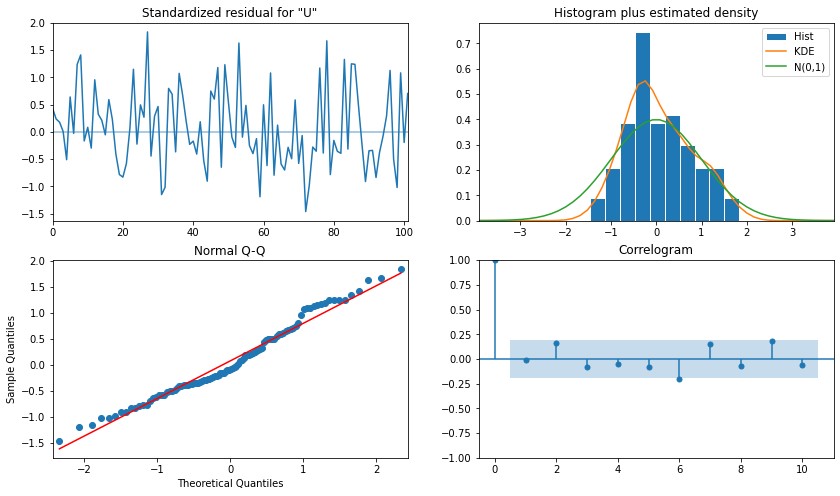

In [465]:
results = model_fit8
results.plot_diagnostics(figsize=(14, 8))
plt.show()

In [ ]:
#ID_material: 120015842
SARIMA parameters: (2, 0, 2) (0, 0, 0, 7)
Stationary
Seasonal: Weekly



In [466]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Set the material ID for which you want to forecast the values
material_id = 120015842

# Filter the data for the specific material ID
material_data = data[data['ID_material'] == material_id]

# Prepare the data for SARIMA
# Assuming your data has a column named 'Date' containing the dates and a column named 'Units' containing the values
dates = material_data['year_week']
units = material_data['Units']

# Filter out zero values
non_zero_units = units[units != 0]

# Train the SARIMA model
order = (2, 0, 2)  # (p, d, q) - Autoregressive (AR) order, Integrated (I) order, Moving Average (MA) order
seasonal_order = (0, 0, 0, 7)  # (P, D, Q, S) - Seasonal AR order, Seasonal Integrated order, Seasonal MA order, Seasonal period
model = sm.tsa.statespace.SARIMAX(non_zero_units, order=order, seasonal_order=seasonal_order)
model_fit9 = model.fit()


# Fit the ARIMA model
model9 = ARIMA(train_data, order=(2, 0, 2), seasonal_order=(0, 0, 0, 7))
model_fit9 = model.fit()

# Print the model summary
print(model_fit9.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.62709D+01    |proj g|=  9.12957D+01

At iterate    5    f=  6.77969D+00    |proj g|=  1.34444D-01

At iterate   10    f=  6.70101D+00    |proj g|=  4.65301D-03

At iterate   15    f=  6.69962D+00    |proj g|=  2.86312D-03

At iterate   20    f=  6.69327D+00    |proj g|=  3.03243D-02

At iterate   25    f=  6.69103D+00    |proj g|=  9.96370D-04

At iterate   30    f=  6.69092D+00    |proj g|=  3.69105D-04

At iterate   35    f=  6.69090D+00    |proj g|=  2.37763D-03

At iterate   40    f=  6.69041D+00    |proj g|=  1.17302D-02

At iterate   45    f=  6.69000D+00    |proj g|=  6.44501D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.


In [467]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read the data from the Excel file
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Exclude zero values from the data
data_without_zeros = data[data['Units'] != 0]

# Filter the data for a specific ID
specific_id = 120015842
data_specific_id = data_without_zeros[data_without_zeros['ID_material'] == specific_id]

# Convert the index to DatetimeIndex
data_specific_id.index = pd.to_datetime(data_specific_id.index)

# Fit the ARIMA model
model = ARIMA(data_specific_id['Units'], order=(2, 0, 2), seasonal_order=(0, 0, 0, 7))
model_fit9 = model.fit()


# Forecast for the next two months
forecast = model_fit9.forecast(steps=8)

# Get the predicted mean values
pred_mean = forecast

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean, squared=False)

# Print the forecasted values and evaluation metrics
print("Forecast:", pred_mean)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Forecast: 97     408.485384
98     424.528498
99     436.246179
100    443.058243
101    444.687050
102    441.166259
103    432.831085
104    420.291091
Name: predicted_mean, dtype: float64
MAE: 191.41172376576355
MSE: 47849.557768185026
RMSE: 218.74541770785743


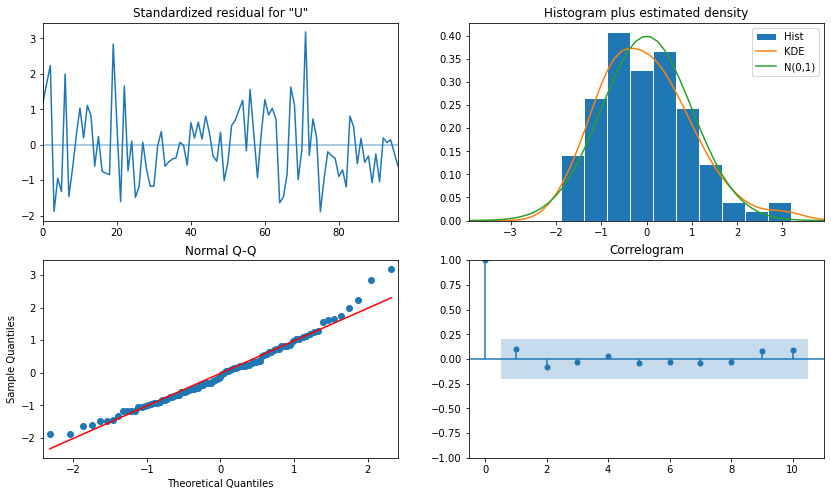

In [468]:
results = model_fit9
results.plot_diagnostics(figsize=(14, 8))
plt.show()

In [ ]:
#ID_material: 120012154
SARIMA parameters: (0, 0, 1) (1, 1, 1, 7)
Stationary
Seasonal: Weekly

In [469]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Set the material ID for which you want to forecast the values
material_id = 120012154

# Filter the data for the specific material ID
material_data = data[data['ID_material'] == material_id]

# Prepare the data for SARIMA
# Assuming your data has a column named 'Date' containing the dates and a column named 'Units' containing the values
dates = material_data['year_week']
units = material_data['Units']

# Filter out zero values
non_zero_units = units[units != 0]

# Train the SARIMA model
order = (0, 0, 1)  # (p, d, q) - Autoregressive (AR) order, Integrated (I) order, Moving Average (MA) order
seasonal_order = (1, 1, 1, 7)  # (P, D, Q, S) - Seasonal AR order, Seasonal Integrated order, Seasonal MA order, Seasonal period
model = sm.tsa.statespace.SARIMAX(non_zero_units, order=order, seasonal_order=seasonal_order)
model_fit10 = model.fit()


# Fit the ARIMA model
model10 = ARIMA(train_data, order=(0, 0, 1), seasonal_order=(1, 1, 1, 7))
model_fit10 = model.fit()

# Print the model summary
print(model_fit10.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49569D+00    |proj g|=  7.82122D-02

At iterate    5    f=  7.47241D+00    |proj g|=  1.02287D-03

At iterate   10    f=  7.47226D+00    |proj g|=  4.92008D-03

At iterate   15    f=  7.44530D+00    |proj g|=  9.94485D-02

At iterate   20    f=  7.41563D+00    |proj g|=  3.76924D-04

At iterate   25    f=  7.41563D+00    |proj g|=  4.20294D-04

At iterate   30    f=  7.41272D+00    |proj g|=  2.06324D-02

At iterate   35    f=  7.41070D+00    |proj g|=  1.51916D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


In [470]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read the data from the Excel file
data = pd.read_excel('Demand_Forecast_dataset.xlsx.xlsx')

# Exclude zero values from the data
data_without_zeros = data[data['Units'] != 0]

# Filter the data for a specific ID
specific_id = 120012154
data_specific_id = data_without_zeros[data_without_zeros['ID_material'] == specific_id]

# Convert the index to DatetimeIndex
data_specific_id.index = pd.to_datetime(data_specific_id.index)

# Fit the ARIMA model
model = ARIMA(data_specific_id['Units'], order=(0, 0, 1), seasonal_order=(1, 1, 1, 7))
model_fit10 = model.fit()


# Forecast for the next two months
forecast = model_fit10.forecast(steps=8)

# Get the predicted mean values
pred_mean = forecast

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(data_specific_id['Units'][-8:], pred_mean, squared=False)

# Print the forecasted values and evaluation metrics
print("Forecast:", pred_mean)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Forecast: 132     875.727745
133    1023.998734
134    1080.061881
135    1165.504418
136     980.323563
137     884.285830
138     835.715994
139    1126.915299
Name: predicted_mean, dtype: float64
MAE: 520.9934885523353
MSE: 365591.9643070322
RMSE: 604.642013349248


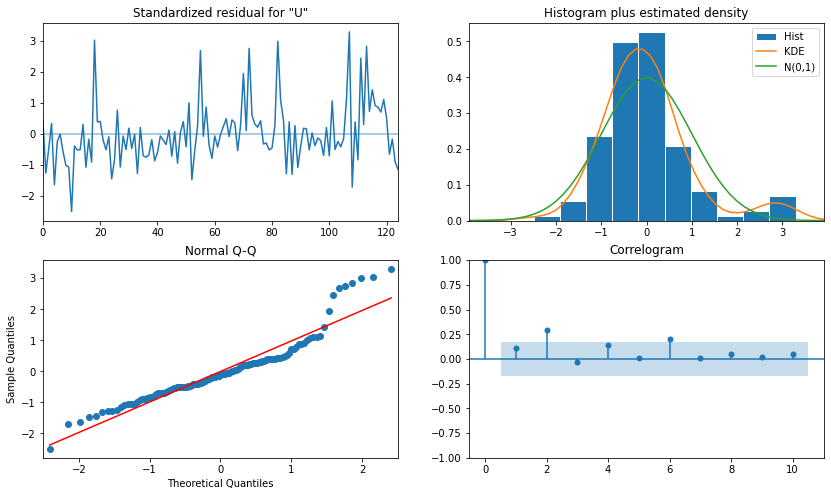

In [471]:
results = model_fit10
results.plot_diagnostics(figsize=(14, 8))
plt.show()

In [ ]:
#ARIMA

In [ ]:
#ID_material: 120011556
Best ARIMA parameters: (0, 1, 2)
Stationary
No significant seasonality

In [475]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Set the material ID for which you want to forecast the values
material_id = 120011556

# Filter the data for the specific material ID
material_data = data[data['ID_material'] == material_id]

# Prepare the data for ARIMA
# Assuming your data has a column named 'Date' containing the dates and a column named 'Units' containing the values
dates = material_data['year_week']
units = material_data['Units']

# Filter out zero values
non_zero_units = units[units != 0]

# Split the data into train and test sets
train_data, test_data = train_test_split(non_zero_units, test_size=0.2, shuffle=False)

# Fit the ARIMA model
order = (0, 1, 2)  # (p, d, q) - Autoregressive (AR) order, Integrated (I) order, Moving Average (MA) order
model = ARIMA(train_data, order=order)
model_fit11 = model.fit()

# Print the model summary
print(model_fit11.summary())


                               SARIMAX Results                                
Dep. Variable:                  Units   No. Observations:                  124
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -783.323
Date:                Wed, 21 Jun 2023   AIC                           1572.645
Time:                        19:07:51   BIC                           1581.082
Sample:                             0   HQIC                          1576.072
                                - 124                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9152      2.494     -0.367      0.714      -5.803       3.972
ma.L2         -0.0844      0.235     -0.359      0.719      -0.545       0.376
sigma2      1.918e+04   4.87e+04      0.394      0.6

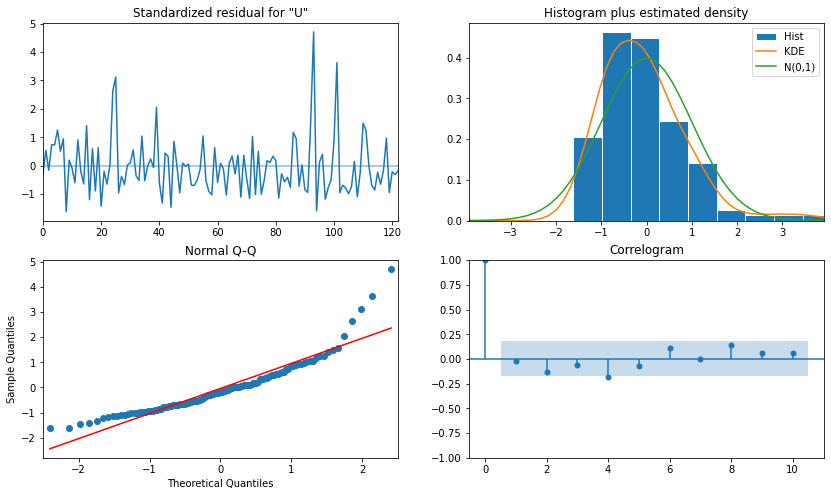

In [476]:
results = model_fit11
results.plot_diagnostics(figsize=(14, 8))
plt.show()

In [ ]:
#ID_material: 120004096
Best ARIMA parameters: (0, 0, 0)
Stationary
No significant seasonality

In [348]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Set the material ID for which you want to forecast the values
material_id = 120004096

# Filter the data for the specific material ID
material_data = data[data['ID_material'] == material_id]

# Prepare the data for ARIMA
# Assuming your data has a column named 'Date' containing the dates and a column named 'Units' containing the values
dates = material_data['year_week']
units = material_data['Units']

# Filter out zero values
non_zero_units = units[units != 0]

# Split the data into train and test sets
train_data, test_data = train_test_split(non_zero_units, test_size=0.2, shuffle=False)

# Fit the ARIMA model
order = (0, 0, 0)  # (p, d, q) - Autoregressive (AR) order, Integrated (I) order, Moving Average (MA) order
model = ARIMA(train_data, order=order)
model_fit12 = model.fit()

# Print the model summary
print(model_fit12.summary())



                               SARIMAX Results                                
Dep. Variable:                  Units   No. Observations:                  185
Model:                          ARIMA   Log Likelihood               -1051.104
Date:                Wed, 21 Jun 2023   AIC                           2106.209
Time:                        17:16:13   BIC                           2112.649
Sample:                             0   HQIC                          2108.819
                                - 185                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.4054      6.127     23.079      0.000     129.397     153.414
sigma2      5041.0363    725.226      6.951      0.000    3619.620    6462.452
Ljung-Box (L1) (Q):                   0.33   Jarque-

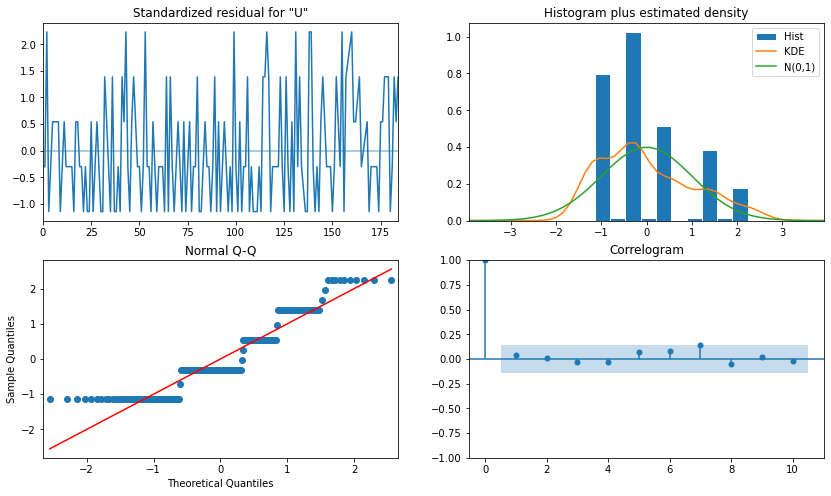

In [350]:
results = model_fit12
results.plot_diagnostics(figsize=(14, 8))
plt.show()

In [ ]:
#ID_material: 120011782
SARIMA parameters: (0, 0, 2) (1, 0, 1, 12)
ARIMA parameters: (0, 0, 0)
Non-Stationary
Seasonal: Weekly, Monthly

In [351]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Set the material ID for which you want to forecast the values
material_id = 120011782

# Filter the data for the specific material ID
material_data = data[data['ID_material'] == material_id]

# Prepare the data for ARIMA
# Assuming your data has a column named 'Date' containing the dates and a column named 'Units' containing the values
dates = material_data['year_week']
units = material_data['Units']

# Filter out zero values
non_zero_units = units[units != 0]

# Split the data into train and test sets
train_data, test_data = train_test_split(non_zero_units, test_size=0.2, shuffle=False)

# Fit the ARIMA model
order = (0, 0, 0)  # (p, d, q) - Autoregressive (AR) order, Integrated (I) order, Moving Average (MA) order
model = ARIMA(train_data, order=order)
model_fit13 = model.fit()

# Print the model summary
print(model_fit13.summary())




                               SARIMAX Results                                
Dep. Variable:                  Units   No. Observations:                  132
Model:                          ARIMA   Log Likelihood                -997.004
Date:                Wed, 21 Jun 2023   AIC                           1998.009
Time:                        17:19:02   BIC                           2003.775
Sample:                             0   HQIC                          2000.352
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2402.9090     41.195     58.330      0.000    2322.168    2483.650
sigma2      2.133e+05    2.7e+04      7.886      0.000     1.6e+05    2.66e+05
Ljung-Box (L1) (Q):                   4.70   Jarque-

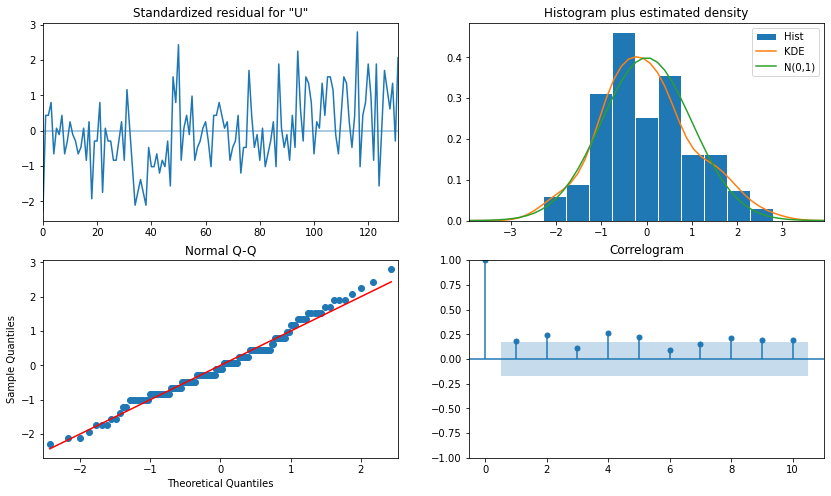

In [352]:
results = model_fit13
results.plot_diagnostics(figsize=(14, 8))
plt.show()

In [480]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Set the material ID for which you want to forecast the values
material_id = 120011782

# Filter the data for the specific material ID
material_data = data[data['ID_material'] == material_id]

# Prepare the data for SARIMA
# Assuming your data has a column named 'Date' containing the dates and a column named 'Units' containing the values
dates = material_data['year_week']
units = material_data['Units']

# Filter out zero values
non_zero_units = units[units != 0]

# Train the SARIMA model
order = (0, 0, 2)  # (p, d, q) - Autoregressive (AR) order, Integrated (I) order, Moving Average (MA) order
seasonal_order = (1, 0, 1, 12)  # (P, D, Q, S) - Seasonal AR order, Seasonal Integrated order, Seasonal MA order, Seasonal period
model = sm.tsa.statespace.SARIMAX(non_zero_units, order=order, seasonal_order=seasonal_order)
model_fit14 = model.fit()


# Fit the ARIMA model
model14 = ARIMA(train_data, order=(0, 0, 2), seasonal_order=(1, 0, 1, 12))
model_fit14 = model.fit()

# Print the model summary
print(model_fit14.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.05644D+00    |proj g|=  4.34616D-01

At iterate    5    f=  8.86225D+00    |proj g|=  1.02778D-02

At iterate   10    f=  8.85889D+00    |proj g|=  3.46747D-04

At iterate   15    f=  8.85854D+00    |proj g|=  7.08665D-03

At iterate   20    f=  8.71077D+00    |proj g|=  5.57614D-01

At iterate   25    f=  8.47208D+00    |proj g|=  3.47364D-02


 This problem is unconstrained.



At iterate   30    f=  8.46650D+00    |proj g|=  1.75400D-02

At iterate   35    f=  8.42265D+00    |proj g|=  1.27562D+00

At iterate   40    f=  8.09347D+00    |proj g|=  1.17007D-01
  ys=-3.271E-08  -gs= 7.583E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   45    f=  7.98270D+00    |proj g|=  1.39477D-02

At iterate   50    f=  7.97711D+00    |proj g|=  1.45984D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    115      2     1     0   1.460D-02   7.977D+00
  F =   7.9771087267619336     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.05644D+00    |proj g|=  4.34616D-01

At iterate    5    f=  8.86225D+00    |proj g|=  1.02778D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


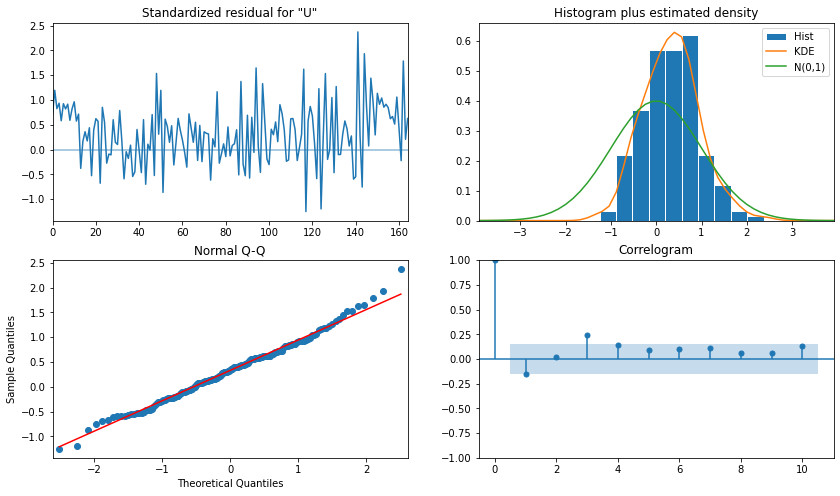

In [481]:
results = model_fit14
results.plot_diagnostics(figsize=(14, 8))
plt.show()